<div style="text-align: center; font-weight: bold; font-size: 40px;">
    Analyse statistique des JO de Tokyo 2020
</div>


<div style="text-align: center; font-weight: bold; font-size: 20px;">
    HU Shuya &  Ben-Othman Elias
</div>


 <div style="text-align: center; font-size: 15px;">
    23 JUIN 2024
</div>


In [31]:
!pip install pillow
!pip install --upgrade oracledb
!pip install cx_Oracle

In [32]:
import os
import getpass
from os import getenv
import pandas as pd
from sqlalchemy import create_engine
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import oracledb
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cx_Oracle

In [33]:
# Nécessaire pour éviter les problèmes de session
class Connexion(object):
    def __init__(self, login, password):
        self.conn = oracledb.connect(
            user=login,
            password=password,
            host="oracle.iut-orsay.fr",
            port=1521,
            sid="etudom",
        )
        self.conn.autocommit = False

    def __enter__(self):
        self.conn.autocommit = False
        return self.conn

    def __exit__(self, *args):
        self.conn.close()

In [34]:
# La fonction ci-dessous est à utiliser pour exécuter une requête et stocker les résultats dans un dataframe Pandas sans afficher d’alerte.
# Vous pouvez vous en inspirer pour créer vos propres fonctions.
def requete_vers_dataframe(connexion_data, requete, valeurs = None):
    with Connexion(login=connexion_data['login'], password=connexion_data['password']) as connexion:
        warnings.simplefilter(action='ignore', category=UserWarning)
        if valeurs is not None:
            df = pd.read_sql(requete, connexion, params=valeurs)
        else:
            df = pd.read_sql(requete, connexion)
        warnings.simplefilter("always") 
        return df

In [35]:
SCHEMA = "SHU"

In [36]:
# On demande à l'utilisateur son login et mot de passe pour pouvoir accéder à la base de données
if getenv("DB_LOGIN") is None:
    login = input("Login : ")
else:
    login = getenv("DB_LOGIN")
if getenv("DB_PASS") is None:
    password = getpass.getpass("Mot de passe : ")
else:
    password = getenv("DB_PASS")
conn = {'login': login, 'password': password}

Login :  shu
Mot de passe :  ········


In [37]:
# Donner droit à AnalyseJO

#login = 'ANALYSEJO'
#if getenv("ANALYSEJO_DB_PASS") is None:
#    password = getpass.getpass("Mot de passe : ")
#else:
#    password = getenv("DB_PASS_PASS")

#conn = oracledb.connect(user=login, password=password, host="oracle.iut-orsay.fr", port=1521, sid="etudom")

In [38]:
from IPython.display import Image, display
display(Image(url='https://mediaproxy.snopes.com/width/1200/https://media.snopes.com/2019/07/olympics-logo-fake-snopes.jpg'))

# Présentation générale de l'édition des JO de Tokyo 2020

Les Jeux Olympiques d'été de 2020, officiellement connus sous le nom des Jeux de la XXXIIe Olympiade, ont eu lieu à Tokyo, Japon. Les Jeux devaient initialement se tenir du 24 juillet au 9 août 2020, mais ils ont été reportés et se sont finalement tenus du 23 juillet au 8 août 2021 en raison de la pandémie de COVID-19. 

##### Tokyo avait déjà accueilli les Jeux Olympiques d'été en 1964, faisant de cette ville la première en Asie à organiser deux éditions des Jeux d'été.

## Contexte et organisation

- Type de compétition : Jeux olympiques

- Pays : Japon

- Ville : Tokyo

- Dates : 23 juillet 2021 - 8 août 2021

- Comité d'organisation : Tokyo Organising Committee of the Olympic and Paralympic Games (OCOG)

- Participants : 11319 athlètes de 206 pays

- Épreuves : 339 épreuves dans 49 disciplines


L'organisation de ces Jeux représente un défi logistique majeur et les organisateurs ont pris des mesures sanitaires strictes pour garantir la sécurité des athlètes et du personnel. Ces mesures comprenaient des tests COVID-19 fréquents, un accès restreint aux spectateurs et la mise en œuvre de protocoles de ségrégation sociale. Par ailleurs, malgré ces défis, les Jeux de Tokyo 2020 ont été un succès en termes de compétition et de performance sportive.

## Moments marquants

- Cérémonie d'ouverture : La cérémonie d'ouverture, qui s'est tenue le 23 juillet 2021, a rendu hommage à l'esprit de résilience et de solidarité mondiale. Elle a mêlé des éléments de la culture japonaise traditionnelle et moderne tout en respectant les mesures de distanciation sociale.

- Nouveaux sports : Tokyo 2020 a introduit de nouveaux sports tels que le skateboard, l'escalade et le surf, attirant une nouvelle génération de passionnés. Le baseball et le softball font également leur retour après leur dernière apparition en 2008.

- Égalité des sexes : pour la première fois dans l'histoire des Jeux olympiques, le nombre d'athlètes féminines est presque égal au nombre d'athlètes masculins, et plusieurs sports mixtes ont été ajoutés pour promouvoir l'égalité des sexes.


 ## Localisation 

In [39]:
from IPython.display import IFrame

# Corrected map URL with proper escaping of quotes
map_url = "https://www.google.com/maps/embed?pb=!1m18!1m12!1m3!1d207446.32915749954!2d139.5760575678981!3d35.668410306969065!2m3!1f0!2f0!3f0!3m2!1i1024!2i768!4f13.1!3m3!1m2!1s0x60188b857628235d%3A0xcdd8aef709a2b520!2sTokyo%2C%20Japon!5e0!3m2!1sfr!2sfr!4v1719081630767!5m2!1sfr!2sfr" 

# Display the map in an iframe
IFrame(src=map_url, width=1500, height=800)

 ## Grandes statistiques 

### Les épreuves présentes :

Le tableau représente les 30 premieres épreuves de cette edition des JO

In [40]:
epreuve= f"""
SELECT DISTINCT NOMEVENEMENT
FROM EVENEMENT e
JOIN HOTE h ON e.IDHOTE = h.IDHOTE
WHERE h.LIBELLEHOTE = '2020 Summer Olympics'
ORDER BY nomevenement
"""
data_epreuve= requete_vers_dataframe(conn, epreuve)
data_epreuve.iloc[0:30]

,NOMEVENEMENT
0,"1,500 metres Freestyle, Men"
1,"1,500 metres Freestyle, Women"
2,"1,500 metres, Men"
3,"1,500 metres, Women"
4,"10 kilometres Open Water, Men"
...,...
25,"200 metres Breaststroke, Women"
26,"200 metres Butterfly, Men"
27,"200 metres Butterfly, Women"
28,"200 metres Freestyle, Men"


### Les sports présentes : 

Le tableau représente les différents sports qui sont presentes en JO 2020

In [41]:
requete_sports = f"""
SELECT DISTINCT NomSport
FROM EVENEMENT e
INNER JOIN HOTE h ON e.IDHOTE = h.IDHOTE
INNER JOIN DISCIPLINE d on d.codediscipline = e.CodeDISCIPLINE
INNER JOIN SPORT s ON s.codesport= d.codesport
WHERE h.LIBELLEHOTE = '2020 Summer Olympics' 
ORDER BY NomSport
"""

data_sport= requete_vers_dataframe(conn, requete_sports)

#data_sport.iloc[0:33]
display(data_sport)

,NOMSPORT
0,Aquatics
1,Archery
2,Athletics
3,Badminton
4,Baseball/Softball
...,...
28,Tennis
29,Triathlon
30,Volleyball
31,Weightlifting


### Les nouvelles épreuves :

Le tebleau represente tous les nouvelles épreuves qui apparait en JO 2020

In [42]:
repartition_nouvelle= f"""
SELECT DISTINCT e.NOMEVENEMENT AS NouvellesEpreuves
FROM EVENEMENT e
JOIN HOTE h ON e.IDHOTE = h.IDHOTE
WHERE h.LIBELLEHOTE = '2020 Summer Olympics'
AND e.NOMEVENEMENT NOT IN (
    SELECT ev.NOMEVENEMENT
    FROM EVENEMENT ev
    JOIN HOTE ho ON ev.IDHOTE = ho.IDHOTE
    WHERE ho.LIBELLEHOTE <> '2020 Summer Olympics'
  )
ORDER BY e.NOMEVENEMENT
"""

data_nouvelle= requete_vers_dataframe(conn, repartition_nouvelle)

data_nouvelle.iloc[0:33]

,NOUVELLESEPREUVES
0,"1,500 metres Freestyle, Women"
1,"3x3 Basketball, Men"
2,"3x3 Basketball, Women"
3,"4 × 100 metres Medley Relay, Mixed"
4,"4 × 400 metres Relay, Mixed"
...,...
24,"Shortboard, Men"
25,"Shortboard, Women"
26,"Street, Men"
27,"Street, Women"


### La répartition des épreuves par genre :

Une graphe qui represente les épreuves par genre: Hommes, Femmes ou mixtes

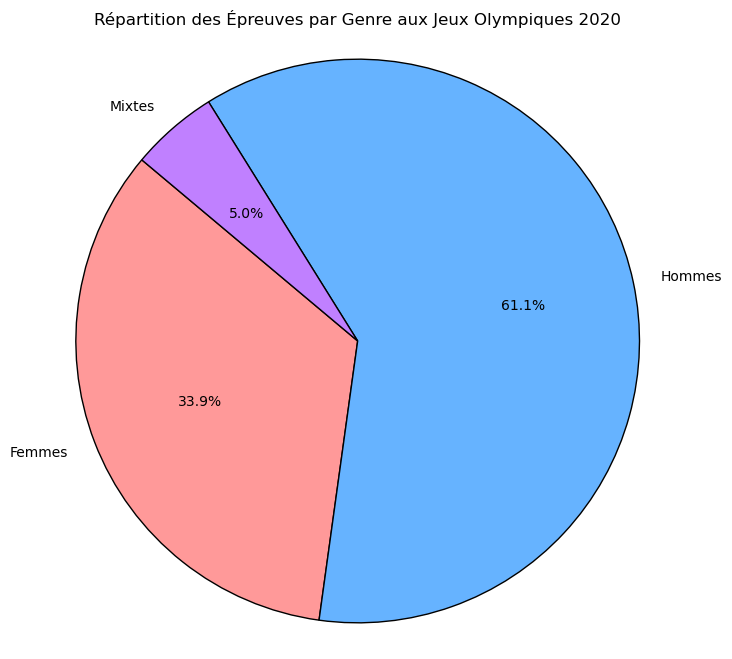

In [43]:
repartition_genre= f"""
SELECT
    GenreEpreuve,
    COUNT(DISTINCT IDEVENEMENT) AS NombreEpreuves
FROM (
    SELECT
        e.IDEVENEMENT,
        CASE 
            WHEN EXISTS (
                SELECT 1
                FROM PARTICIPATION_INDIVIDUELLE pi
                JOIN ATHLETE a ON pi.IDATHLETE = a.IDATHLETE
                WHERE pi.IDEVENT = e.IDEVENEMENT
                  AND a.GENRE = 'Male'
                  AND pi.MEDAILLE IS NOT NULL
            )
            AND EXISTS (
                SELECT 1
                FROM PARTICIPATION_INDIVIDUELLE pi
                JOIN ATHLETE a ON pi.IDATHLETE = a.IDATHLETE
                WHERE pi.IDEVENT = e.IDEVENEMENT
                  AND a.GENRE = 'Female'
                  AND pi.MEDAILLE IS NOT NULL
            ) THEN 'Mixtes'
            WHEN EXISTS (
                SELECT 1
                FROM PARTICIPATION_INDIVIDUELLE pi
                JOIN ATHLETE a ON pi.IDATHLETE = a.IDATHLETE
                WHERE pi.IDEVENT = e.IDEVENEMENT
                  AND a.GENRE = 'Male'
                  AND pi.MEDAILLE IS NOT NULL
            ) THEN 'Hommes'
            WHEN EXISTS (
                SELECT 1
                FROM PARTICIPATION_INDIVIDUELLE pi
                JOIN ATHLETE a ON pi.IDATHLETE = a.IDATHLETE
                WHERE pi.IDEVENT = e.IDEVENEMENT
                  AND a.GENRE = 'Female'
                  AND pi.MEDAILLE IS NOT NULL
            ) THEN 'Femmes'
            ELSE 'Total epreuve'
        END AS GenreEpreuve
    FROM 
        EVENEMENT e
    JOIN 
        HOTE h ON e.IDHOTE = h.IDHOTE
    WHERE 
        h.LIBELLEHOTE = '2020 Summer Olympics'
    
    UNION ALL
    
    SELECT
        e.IDEVENEMENT,
        CASE 
            WHEN EXISTS (
                SELECT 1
                FROM PARTICIPATION_EQUIPE pe
                JOIN EQUIPE eq ON pe.IDEQUIPE = eq.IDEQUIPE
                JOIN COMPOSITION_EQUIPE ce ON pe.IDEQUIPE = ce.IDEQUIPE
                JOIN ATHLETE a ON ce.IDATHLETE = a.IDATHLETE
                WHERE pe.IDEVENEMENT = e.IDEVENEMENT
                  AND pe.MEDAILLE IS NOT NULL
                  AND a.GENRE = 'Male'
            )
            AND EXISTS (
                SELECT 1
                FROM PARTICIPATION_EQUIPE pe
                JOIN EQUIPE eq ON pe.IDEQUIPE = eq.IDEQUIPE
                JOIN COMPOSITION_EQUIPE ce ON pe.IDEQUIPE = ce.IDEQUIPE
                JOIN ATHLETE a ON ce.IDATHLETE = a.IDATHLETE
                WHERE pe.IDEVENEMENT = e.IDEVENEMENT
                  AND pe.MEDAILLE IS NOT NULL
                  AND a.GENRE = 'Female'
            ) THEN 'Mixtes'
            WHEN EXISTS (
                SELECT 1
                FROM PARTICIPATION_EQUIPE pe
                WHERE pe.IDEVENEMENT = e.IDEVENEMENT
                  AND pe.MEDAILLE IS NOT NULL
            ) THEN 'Hommes'
            WHEN EXISTS (
                SELECT 1
                FROM PARTICIPATION_EQUIPE pe
                JOIN EQUIPE eq ON pe.IDEQUIPE = eq.IDEQUIPE
                JOIN COMPOSITION_EQUIPE ce ON pe.IDEQUIPE = ce.IDEQUIPE
                JOIN ATHLETE a ON ce.IDATHLETE = a.IDATHLETE
                WHERE pe.IDEVENEMENT = e.IDEVENEMENT
                  AND pe.MEDAILLE IS NOT NULL
                  AND a.GENRE = 'Female'
            ) THEN 'Femmes'
             ELSE 'Total epreuve'
        END AS GenreEpreuve
    FROM 
        EVENEMENT e
    JOIN 
        HOTE h ON e.IDHOTE = h.IDHOTE
    WHERE 
        h.LIBELLEHOTE = '2020 Summer Olympics'
) epreuves
JOIN (
    SELECT DISTINCT pi.IDEVENT
    FROM PARTICIPATION_INDIVIDUELLE pi
    JOIN ATHLETE a ON pi.IDATHLETE = a.IDATHLETE
    WHERE pi.MEDAILLE IS NOT NULL
    
    UNION
    
    SELECT DISTINCT pe.IDEVENEMENT
    FROM PARTICIPATION_EQUIPE pe
    JOIN EQUIPE eq ON pe.IDEQUIPE = eq.IDEQUIPE
    JOIN COMPOSITION_EQUIPE ce ON pe.IDEQUIPE = ce.IDEQUIPE
    JOIN ATHLETE a ON ce.IDATHLETE = a.IDATHLETE
    WHERE pe.MEDAILLE IS NOT NULL
) p ON epreuves.IDEVENEMENT = p.IDEVENT
GROUP BY 
    GenreEpreuve
ORDER BY 
    GenreEpreuve
"""

data_genre= requete_vers_dataframe(conn, repartition_genre)



data_genre_filtre = data_genre[data_genre['GENREEPREUVE'] != 'Total epreuve']
labels = data_genre_filtre['GENREEPREUVE']
sizes = data_genre_filtre['NOMBREEPREUVES']
colors = ['#ff9999','#66b3ff','#c080ff']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Répartition des Épreuves par Genre aux Jeux Olympiques 2020')
plt.axis('equal')
plt.show()

### Analyse des performances

Ici, on utilise des courbes pour visualiser la performance des athlethe des JO 2020 en fonction de leur l'âge et taille

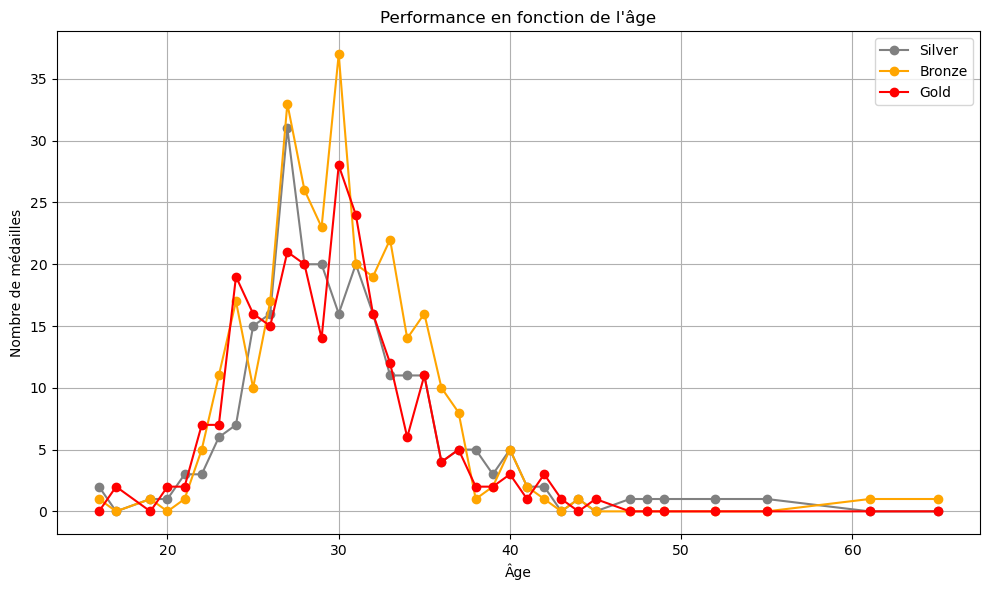

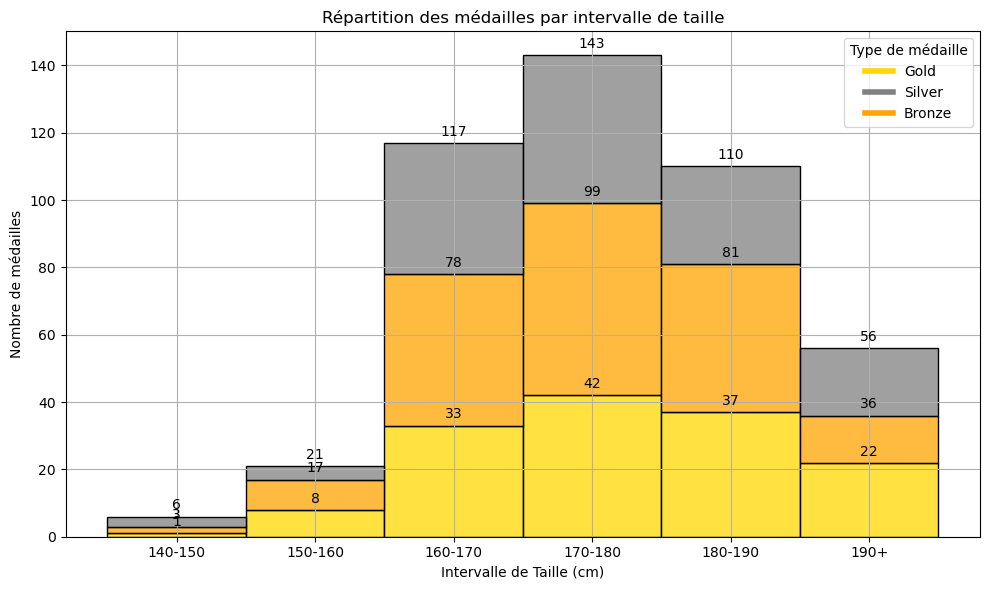

In [44]:
performance = f"""
SELECT
    a.IDATHLETE,
   CASE
        WHEN a.datedeces IS NOT NULL THEN EXTRACT(YEAR FROM a.datedeces) - EXTRACT(YEAR FROM a.DATENAISSANCE)
        ELSE EXTRACT(YEAR FROM SYSDATE) - EXTRACT(YEAR FROM a.DATENAISSANCE)
    END AS AGE,
    a.POIDS,
    a.TAILLE,
    pi.MEDAILLE,
    e.NOMEVENEMENT
FROM
    ATHLETE a
JOIN
    PARTICIPATION_INDIVIDUELLE pi ON a.IDATHLETE = pi.IDATHLETE
JOIN
    EVENEMENT e ON pi.IDEVENT = e.IDEVENEMENT
JOIN
    HOTE h ON e.IDHOTE = h.IDHOTE
WHERE
    h.LIBELLEHOTE = '2020 Summer Olympics'
"""

data_performance= requete_vers_dataframe(conn, performance)


# AGE
data_performance_age = data_performance.groupby(['AGE', 'MEDAILLE']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))

plt.plot(data_performance_age.index, data_performance_age['Silver'], marker='o', linestyle='-', color='gray', label='Silver')
plt.plot(data_performance_age.index, data_performance_age['Bronze'], marker='o', linestyle='-', color='orange', label='Bronze')
plt.plot(data_performance_age.index, data_performance_age['Gold'], marker='o', linestyle='-', color='r', label='Gold')

plt.title('Performance en fonction de l\'âge')
plt.xlabel('Âge')
plt.ylabel('Nombre de médailles')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




# TAILLE
bins = [140, 150, 160, 170, 180, 190, 200]
labels = ['140-150', '150-160', '160-170', '170-180', '180-190', '190+']
data_performance['TAILLE_INTERVAL'] = pd.cut(data_performance['TAILLE'], bins=bins, labels=labels, right=False)


plt.figure(figsize=(10, 6))


ax = sns.histplot(data=data_performance, x='TAILLE_INTERVAL', hue='MEDAILLE', multiple='stack',
                  palette={'Gold': 'gold', 'Silver': 'gray', 'Bronze': 'orange'})

plt.title('Répartition des médailles par intervalle de taille')
plt.xlabel('Intervalle de Taille (cm)')
plt.ylabel('Nombre de médailles')
plt.grid(True)
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fontsize=10, padding=3, label_type='edge')
    
handles = [
    plt.Line2D([0], [0], color='gold', lw=4, label='Gold'),
    plt.Line2D([0], [0], color='gray', lw=4, label='Silver'),
    plt.Line2D([0], [0], color='orange', lw=4, label='Bronze')
]
plt.legend(handles=handles, title='Type de médaille')

plt.show()



# POIDs
# Je trouve que cette grqphe n'est pas très representatif.

#data_performance_poid = data_performance.groupby(['POIDS', 'MEDAILLE']).size().unstack(fill_value=0)
#plt.figure(figsize=(10, 6))
#plt.plot(data_performance_poid.index, data_performance_poid['Silver'], marker='o', linestyle='-', color='gray', label='Silver')
#plt.plot(data_performance_poid.index, data_performance_poid['Bronze'], marker='o', linestyle='-', color='orange', label='Bronze')
#plt.plot(data_performance_poid.index, data_performance_poid['Gold'], marker='o', linestyle='-', color='r', label='Gold')
#plt.title('Performance en fonction du poids')
#plt.xlabel('POIDS (en kg')
#plt.ylabel('Nombre de médailles')
#plt.legend()
#plt.grid(True)
#plt.tight_layout()
#plt.show()






 # Comparaison d'édition 2020 Summer Olympics avec d'autres éditions

## Introduction

Dans cette section, nous nous concentrons sur une analyse comparative des Jeux Olympiques de Tokyo 2020 avec les Jeux précédents, en examinant les performances des pays et des athlètes ainsi que les tendances à long terme. Ces Jeux olympiques ont été confrontés à des défis uniques, tels que la pandémie de COVID-19, mais ont également donné lieu à une série de réalisations et de records extraordinaires. Dans cette étude, nous explorerons plusieurs aspects clés qui ont influencé ces Jeux, en utilisant des données détaillées pour évaluer la performance des pays, la diversité des médailles et l'évolution des Jeux par rapport aux précédents.

## Analyese des résultats

### Classement des nations : 

In [45]:
classement2020 = f"""
SELECT 
    n.codenoc,
    COALESCE(medailles_individuelles.GOLD_Medailles, 0) + COALESCE(medailles_equipes.GOLD_Medailles, 0) AS GOLD_Medailles,
    COALESCE(medailles_individuelles.SILVER_Medailles, 0) + COALESCE(medailles_equipes.SILVER_Medailles, 0) AS SILVER_Medailles,
    COALESCE(medailles_individuelles.BRONZE_Medailles, 0) + COALESCE(medailles_equipes.BRONZE_Medailles, 0) AS BRONZE_Medailles,
    COALESCE(medailles_individuelles.TOT_Medailles, 0) + COALESCE(medailles_equipes.TOT_Medailles, 0) AS TOT_Medailles
FROM 
    NOC n
LEFT JOIN (
    SELECT 
        pi.NOC AS codenoc,
        SUM(CASE WHEN pi.medaille = 'Gold' THEN 1 ELSE 0 END) AS GOLD_Medailles,
        SUM(CASE WHEN pi.medaille = 'Silver' THEN 1 ELSE 0 END) AS SILVER_Medailles,
        SUM(CASE WHEN pi.medaille = 'Bronze' THEN 1 ELSE 0 END) AS BRONZE_Medailles,
        COUNT(pi.medaille) AS TOT_Medailles
    FROM 
        PARTICIPATION_INDIVIDUELLE pi
    JOIN
        EVENEMENT e ON pi.IDEVENT = e.IDEVENEMENT
    JOIN 
        HOTE h ON e.IDHOTE = h.IDHOTE
    WHERE 
        h.LIBELLEHOTE = '2020 Summer Olympics'
    GROUP BY 
        pi.NOC
) medailles_individuelles ON n.codenoc = medailles_individuelles.codenoc
LEFT JOIN (
    SELECT 
        e.NOC AS codenoc,
        SUM(CASE WHEN pe.medaille = 'Gold' THEN 1 ELSE 0 END) AS GOLD_Medailles,
        SUM(CASE WHEN pe.medaille = 'Silver' THEN 1 ELSE 0 END) AS SILVER_Medailles,
        SUM(CASE WHEN pe.medaille = 'Bronze' THEN 1 ELSE 0 END) AS BRONZE_Medailles,
        COUNT(pe.medaille) AS TOT_Medailles
    FROM 
        PARTICIPATION_EQUIPE pe
    JOIN 
        EQUIPE e ON pe.idequipe = e.idequipe
    JOIN 
        EVENEMENT ev ON pe.IDEVENEMENT = ev.IDEVENEMENT
    JOIN 
        HOTE h ON ev.IDHOTE = h.IDHOTE
    WHERE 
        h.LIBELLEHOTE = '2020 Summer Olympics'
    GROUP BY 
        e.NOC
) medailles_equipes ON n.codenoc = medailles_equipes.codenoc
ORDER BY 
    GOLD_Medailles DESC, 
    SILVER_Medailles DESC, 
    BRONZE_Medailles DESC, 
    TOT_Medailles DESC,
    n.codenoc
"""


classement1948 = f"""
SELECT 
    n.codenoc,
    COALESCE(medailles_individuelles.GOLD_Medailles, 0) + COALESCE(medailles_equipes.GOLD_Medailles, 0) AS GOLD_Medailles,
    COALESCE(medailles_individuelles.SILVER_Medailles, 0) + COALESCE(medailles_equipes.SILVER_Medailles, 0) AS SILVER_Medailles,
    COALESCE(medailles_individuelles.BRONZE_Medailles, 0) + COALESCE(medailles_equipes.BRONZE_Medailles, 0) AS BRONZE_Medailles,
    COALESCE(medailles_individuelles.TOT_Medailles, 0) + COALESCE(medailles_equipes.TOT_Medailles, 0) AS TOT_Medailles
FROM 
    NOC n
LEFT JOIN (
    SELECT 
        pi.NOC AS codenoc,
        SUM(CASE WHEN pi.medaille = 'Gold' THEN 1 ELSE 0 END) AS GOLD_Medailles,
        SUM(CASE WHEN pi.medaille = 'Silver' THEN 1 ELSE 0 END) AS SILVER_Medailles,
        SUM(CASE WHEN pi.medaille = 'Bronze' THEN 1 ELSE 0 END) AS BRONZE_Medailles,
        COUNT(pi.medaille) AS TOT_Medailles
    FROM 
        PARTICIPATION_INDIVIDUELLE pi
    JOIN
        EVENEMENT e ON pi.IDEVENT = e.IDEVENEMENT
    JOIN 
        HOTE h ON e.IDHOTE = h.IDHOTE
    WHERE 
        h.LIBELLEHOTE = '1948 Summer Olympics'
    GROUP BY 
        pi.NOC
) medailles_individuelles ON n.codenoc = medailles_individuelles.codenoc
LEFT JOIN (
    SELECT 
        e.NOC AS codenoc,
        SUM(CASE WHEN pe.medaille = 'Gold' THEN 1 ELSE 0 END) AS GOLD_Medailles,
        SUM(CASE WHEN pe.medaille = 'Silver' THEN 1 ELSE 0 END) AS SILVER_Medailles,
        SUM(CASE WHEN pe.medaille = 'Bronze' THEN 1 ELSE 0 END) AS BRONZE_Medailles,
        COUNT(pe.medaille) AS TOT_Medailles
    FROM 
        PARTICIPATION_EQUIPE pe
    JOIN 
        EQUIPE e ON pe.idequipe = e.idequipe
    JOIN 
        EVENEMENT ev ON pe.IDEVENEMENT = ev.IDEVENEMENT
    JOIN 
        HOTE h ON ev.IDHOTE = h.IDHOTE
    WHERE 
        h.LIBELLEHOTE = '1948 Summer Olympics'
    GROUP BY 
        e.NOC
) medailles_equipes ON n.codenoc = medailles_equipes.codenoc
ORDER BY 
    GOLD_Medailles DESC, 
    SILVER_Medailles DESC, 
    BRONZE_Medailles DESC, 
    TOT_Medailles DESC,
    n.codenoc
"""




from IPython.display import display_html


def display_side_by_side(*args, titles=['Tableau 1', 'Tableau 2']):
    html_str = '<div style="display:flex; flex-direction:row;">'
    for i, df in enumerate(args):
        html_str += f'<div style="margin-right:10px;"><h2>{titles[i]}</h2>{df.to_html()}</div>'
    html_str += '</div>'
    display_html(html_str, raw=True)


data_classement2020 = requete_vers_dataframe(conn, classement2020)
data_classement1948 = requete_vers_dataframe(conn, classement1948)


data_classement2020_filtre = data_classement2020[(data_classement2020['GOLD_MEDAILLES'] > 0) |
                                                 (data_classement2020['SILVER_MEDAILLES'] > 0) |
                                                 (data_classement2020['BRONZE_MEDAILLES'] > 0)]

data_classement1948_filtre = data_classement1948[(data_classement1948['GOLD_MEDAILLES'] > 0) |
                                                 (data_classement1948['SILVER_MEDAILLES'] > 0) |
                                                 (data_classement1948['BRONZE_MEDAILLES'] > 0)]


display_side_by_side(data_classement1948_filtre, data_classement2020_filtre, titles=['Classement des nations 1948', 'Classement des nations 2020'])


,CODENOC,GOLD_MEDAILLES,SILVER_MEDAILLES,BRONZE_MEDAILLES,TOT_MEDAILLES
0,USA,38,27,19,84
1,SWE,17,11,18,46
2,FRA,11,6,15,32
3,FIN,10,8,6,24
4,HUN,10,5,13,28
5,ITA,9,12,10,31
6,TUR,6,4,2,12
7,TCH,6,2,3,11
8,SUI,5,11,5,21
9,DEN,5,8,9,22


Ce tableau compare les résultats des pays aux Jeux olympiques de 1948 et de 2020, révélant un changement significatif dans leurs performances : en 1948, les États-Unis d'Amérique ont dominé, remportant 84 médailles, dont 38 d'or, 27 d'argent et 19 de bronze. 

Cette domination se poursuit en 2020 avec 113 médailles (39 en or, 41 en argent et 33 en bronze). La Chine, qui n'était pas en tête de liste en 1948, est en deuxième position en 2020 avec 89 médailles (38 en or, 32 en argent et 19 en bronze), ce qui témoigne de son impressionnante montée en puissance. Le Japon, en troisième position en 2020 avec 58 médailles (27 en or, 14 en argent et 17 en bronze), s'est lui aussi considérablement amélioré au fil des ans. Certains pays européens, comme la Suède, qui était troisième avec 44 médailles en 1948, ont vu leur performance baisser, ne remportant que neuf médailles en 2020. 

La France et la Grande-Bretagne ont maintenu une position relativement stable dans le top 10 lors des deux éditions. En revanche, des pays comme l'Australie et le Canada ont progressé dans le classement, tandis que des pays comme la République de Chine (Russie) sont entrés dans le top 10 en 2020, ce qui n'était pas le cas en 1948. Ces changements dans les performances reflètent les changements géopolitiques, économiques et sociaux mondiaux, ainsi que les investissements dans le sport et les infrastructures.

### Répartition des médailles par pays: 

In [46]:
medaillenoc=f"""
SELECT 
    n.codenoc,
    COALESCE(medailles_individuelles.GOLD_Medailles, 0) + COALESCE(medailles_equipes.GOLD_Medailles, 0) AS GOLD_Medailles,
    COALESCE(medailles_individuelles.SILVER_Medailles, 0) + COALESCE(medailles_equipes.SILVER_Medailles, 0) AS SILVER_Medailles,
    COALESCE(medailles_individuelles.BRONZE_Medailles, 0) + COALESCE(medailles_equipes.BRONZE_Medailles, 0) AS BRONZE_Medailles,
    COALESCE(medailles_individuelles.TOT_Medailles, 0) + COALESCE(medailles_equipes.TOT_Medailles, 0) AS TOT_Medailles
FROM 
    NOC n
LEFT JOIN (
    SELECT 
        pi.NOC AS codenoc,
        SUM(CASE WHEN pi.medaille = 'Gold' THEN 1 ELSE 0 END) AS GOLD_Medailles,
        SUM(CASE WHEN pi.medaille = 'Silver' THEN 1 ELSE 0 END) AS SILVER_Medailles,
        SUM(CASE WHEN pi.medaille = 'Bronze' THEN 1 ELSE 0 END) AS BRONZE_Medailles,
        COUNT(pi.medaille) AS TOT_Medailles
    FROM 
        PARTICIPATION_INDIVIDUELLE pi
    JOIN 
        EVENEMENT e ON pi.IDEVENT = e.IDEVENEMENT
    JOIN 
        HOTE h ON e.IDHOTE = h.IDHOTE
    WHERE 
        h.LIBELLEHOTE = '2020 Summer Olympics'
    GROUP BY 
        pi.NOC
) medailles_individuelles ON n.codenoc = medailles_individuelles.codenoc
LEFT JOIN (
    SELECT 
        eq.NOC AS codenoc,
        SUM(CASE WHEN pe.medaille = 'Gold' THEN 1 ELSE 0 END) AS GOLD_Medailles,
        SUM(CASE WHEN pe.medaille = 'Silver' THEN 1 ELSE 0 END) AS SILVER_Medailles,
        SUM(CASE WHEN pe.medaille = 'Bronze' THEN 1 ELSE 0 END) AS BRONZE_Medailles,
        COUNT(pe.medaille) AS TOT_Medailles
    FROM 
        PARTICIPATION_EQUIPE pe
    JOIN 
        EQUIPE eq ON pe.idequipe = eq.idequipe
    JOIN 
        EVENEMENT ev ON pe.IDEVENEMENT = ev.IDEVENEMENT
    JOIN 
        HOTE h ON ev.IDHOTE = h.IDHOTE
    WHERE 
        h.LIBELLEHOTE = '2020 Summer Olympics'
    GROUP BY 
        eq.NOC
) medailles_equipes ON n.codenoc = medailles_equipes.codenoc
ORDER BY 
    GOLD_Medailles DESC, SILVER_Medailles DESC, BRONZE_Medailles DESC, TOT_Medailles DESC, n.codenoc
"""
data_medaillenoc = requete_vers_dataframe(conn, medaillenoc)


data_medaillenoc = data_medaillenoc.rename(columns={
    'GOLD_MEDAILLES': 'GOLD_Medailles',
    'SILVER_MEDAILLES': 'SILVER_Medailles',
    'BRONZE_MEDAILLES': 'BRONZE_Medailles',
    'TOT_MEDAILLES': 'TOT_Medailles'
})

statistiques_medailles_pays  = data_medaillenoc.groupby('CODENOC').agg({
    'GOLD_Medailles': ['mean', 'std', 'min', 'max', 'median'],
    'SILVER_Medailles': ['mean', 'std', 'min', 'max', 'median'],
    'BRONZE_Medailles': ['mean', 'std', 'min', 'max', 'median'],
    'TOT_Medailles': ['mean', 'std', 'min', 'max', 'median']
}).round(1)



statistiques_medailles_pays_filtered = statistiques_medailles_pays[
    (statistiques_medailles_pays[('GOLD_Medailles', 'mean')] > 0) |
    (statistiques_medailles_pays[('SILVER_Medailles', 'mean')] > 0) |
    (statistiques_medailles_pays[('BRONZE_Medailles', 'mean')] > 0) |
    (statistiques_medailles_pays[('TOT_Medailles', 'mean')] > 0)
].reset_index()


statistiques_medailles_pays_filtered = statistiques_medailles_pays_filtered.sort_values(
    by=('GOLD_Medailles', 'mean'), ascending=False
).reset_index(drop=True)

statistiques_medailles_pays_filtered = statistiques_medailles_pays_filtered[['CODENOC'] + [col[0] for col in statistiques_medailles_pays_filtered.columns[1:]]]


pd.set_option('display.max_rows', 20) 
pd.set_option('display.max_columns',None) 

print("Statistiques des médailles par pays (exclut ceux sans médailles) :")
display(statistiques_medailles_pays_filtered)


Statistiques des médailles par pays (exclut ceux sans médailles) :


CODENOC GOLD_Medailles                                                    \
                     mean std min max median  mean std min max median  mean   
0      USA           39.0 NaN  39  39   39.0  39.0 NaN  39  39   39.0  39.0   
1      CHN           38.0 NaN  38  38   38.0  38.0 NaN  38  38   38.0  38.0   
2      JPN           27.0 NaN  27  27   27.0  27.0 NaN  27  27   27.0  27.0   
3      GBR           22.0 NaN  22  22   22.0  22.0 NaN  22  22   22.0  22.0   
4      ROC           20.0 NaN  20  20   20.0  20.0 NaN  20  20   20.0  20.0   
..     ...            ...  ..  ..  ..    ...   ...  ..  ..  ..    ...   ...   
88     MDA            0.0 NaN   0   0    0.0   0.0 NaN   0   0    0.0   0.0   
89     MEX            0.0 NaN   0   0    0.0   0.0 NaN   0   0    0.0   0.0   
90     MGL            0.0 NaN   0   0    0.0   0.0 NaN   0   0    0.0   0.0   
91     MKD            0.0 NaN   0   0    0.0   0.0 NaN   0   0    0.0   0.0   
92     JOR            0.0 NaN   0   0    0.0   0.0 NaN   0   0    0.0   0.0   

                                                                         \
   std min max median  mean std min max median  mean std min max median   
0  NaN  39  39   39.0  39.0 NaN  39  39   39.0  39.0 NaN  39  39   39.0   
1  NaN  38  38   38.0  38.0 NaN  38  38   38.0  38.0 NaN  38  38   38.0   
2  NaN  27  27   27.0  27.0 NaN  27  27   27.0  27.0 NaN  27  27   27.0   
3  NaN  22  22   22.0  22.0 NaN  22  22   22.0  22.0 NaN  22  22   22.0   
4  NaN  20  20   20.0  20.0 NaN  20  20   20.0  20.0 NaN  20  20   20.0   
..  ..  ..  ..    ...   ...  ..  ..  ..    ...   ...  ..  ..  ..    ...   
88 NaN   0   0    0.0   0.0 NaN   0   0    0.0   0.0 NaN   0   0    0.0   
89 NaN   0   0    0.0   0.0 NaN   0   0    0.0   0.0 NaN   0   0    0.0   
90 NaN   0   0    0.0   0.0 NaN   0   0    0.0   0.0 NaN   0   0    0.0   
91 NaN   0   0    0.0   0.0 NaN   0   0    0.0   0.0 NaN   0   0    0.0   
92 NaN   0   0    0.0   0.0 NaN   0   0    0.0   0.0 NaN   0   0    0.0   

   SILVER_Medailles                                                            \
               mean std min max median  mean std min max median  mean std min   
0              41.0 NaN  41  41   41.0  41.0 NaN  41  41   41.0  41.0 NaN  41   
1              32.0 NaN  32  32   32.0  32.0 NaN  32  32   32.0  32.0 NaN  32   
2              14.0 NaN  14  14   14.0  14.0 NaN  14  14   14.0  14.0 NaN  14   
3              20.0 NaN  20  20   20.0  20.0 NaN  20  20   20.0  20.0 NaN  20   
4              28.0 NaN  28  28   28.0  28.0 NaN  28  28   28.0  28.0 NaN  28   
..              ...  ..  ..  ..    ...   ...  ..  ..  ..    ...   ...  ..  ..   
88              0.0 NaN   0   0    0.0   0.0 NaN   0   0    0.0   0.0 NaN   0   
89              0.0 NaN   0   0    0.0   0.0 NaN   0   0    0.0   0.0 NaN   0   
90              1.0 NaN   1   1    1.0   1.0 NaN   1   1    1.0   1.0 NaN   1   
91              1.0 NaN   1   1    1.0   1.0 NaN   1   1    1.0   1.0 NaN   1   
92              1.0 NaN   1   1    1.0   1.0 NaN   1   1    1.0   1.0 NaN   1   

                                                                 \
   max median  mean std min max median  mean std min max median   
0   41   41.0  41.0 NaN  41  41   41.0  41.0 NaN  41  41   41.0   
1   32   32.0  32.0 NaN  32  32   32.0  32.0 NaN  32  32   32.0   
2   14   14.0  14.0 NaN  14  14   14.0  14.0 NaN  14  14   14.0   
3   20   20.0  20.0 NaN  20  20   20.0  20.0 NaN  20  20   20.0   
4   28   28.0  28.0 NaN  28  28   28.0  28.0 NaN  28  28   28.0   
..  ..    ...   ...  ..  ..  ..    ...   ...  ..  ..  ..    ...   
88   0    0.0   0.0 NaN   0   0    0.0   0.0 NaN   0   0    0.0   
89   0    0.0   0.0 NaN   0   0    0.0   0.0 NaN   0   0    0.0   
90   1    1.0   1.0 NaN   1   1    1.0   1.0 NaN   1   1    1.0   
91   1    1.0   1.0 NaN   1   1    1.0   1.0 NaN   1   1    1.0   
92   1    1.0   1.0 NaN   1   1    1.0   1.0 NaN   1   1    1.0   

   BRONZE_Medailles                                                      

### Répartition des médailles par genre et pays: 

In [47]:
if conn:
    try:

        curseur = conn.cursor()


        med_genre_pays = """
        CREATE OR REPLACE VIEW med_genre_pays AS
        WITH indi_medailles AS (
            SELECT 
                n.codenoc AS noc,
                a.genre AS genre,
                h.libellehote AS libellehote,
                COALESCE(SUM(CASE WHEN pi.medaille = 'Gold' THEN 1 ELSE 0 END), 0) AS gold_medals,
                COALESCE(SUM(CASE WHEN pi.medaille = 'Silver' THEN 1 ELSE 0 END), 0) AS silver_medals,
                COALESCE(SUM(CASE WHEN pi.medaille = 'Bronze' THEN 1 ELSE 0 END), 0) AS bronze_medals
            FROM 
                noc n
            LEFT JOIN 
                participation_individuelle pi ON pi.noc = n.codenoc
            LEFT JOIN
                athlete a ON a.idathlete = pi.idathlete
            LEFT JOIN
                evenement ev ON pi.idevent = ev.idevenement
            LEFT JOIN
                hote h ON ev.idhote = h.idhote
            WHERE h.libellehote = '2020 Summer Olympics'
            GROUP BY 
                n.codenoc, a.genre, h.libellehote
        ),
        equipe_medialles AS (
            SELECT 
                n.codenoc AS noc,
                a.genre AS genre,
                h.libellehote AS libellehote,
                COALESCE(SUM(CASE WHEN pe.medaille = 'Gold' THEN 1 ELSE 0 END), 0) AS gold_medals,
                COALESCE(SUM(CASE WHEN pe.medaille = 'Silver' THEN 1 ELSE 0 END), 0) AS silver_medals,
                COALESCE(SUM(CASE WHEN pe.medaille = 'Bronze' THEN 1 ELSE 0 END), 0) AS bronze_medals
            FROM 
                noc n
            LEFT JOIN 
                equipe e ON e.noc = n.codenoc
            LEFT JOIN 
                participation_equipe pe ON e.idequipe = pe.idequipe
            LEFT JOIN
                composition_equipe ce ON ce.idequipe = e.idequipe
            LEFT JOIN
                athlete a ON a.idathlete = ce.idathlete
            LEFT JOIN
                evenement ev ON pe.idevenement = ev.idevenement
            LEFT JOIN
                hote h ON ev.idhote = h.idhote
            WHERE h.libellehote = '2020 Summer Olympics'
            GROUP BY 
                n.codenoc, a.genre, h.libellehote
        )
        SELECT 
            im.noc,
            im.genre,
            im.libellehote,
            COALESCE(im.gold_medals, 0) + COALESCE(tm.gold_medals, 0) AS gold_medals,
            COALESCE(im.silver_medals, 0) + COALESCE(tm.silver_medals, 0) AS silver_medals,
            COALESCE(im.bronze_medals, 0) + COALESCE(tm.bronze_medals, 0) AS bronze_medals
        FROM 
            indi_medailles im
        LEFT JOIN 
            equipe_medialles tm ON im.noc = tm.noc AND im.genre = tm.genre AND im.libellehote = tm.libellehote
        ORDER BY 
            im.noc, im.genre, im.libellehote
        """

    
        curseur.execute(med_genre_pays)

     
        curseur.execute("SELECT * FROM med_genre_pays")
        data_med_genre_pays = pd.DataFrame(curseur.fetchall(), columns=[desc[0] for desc in curseur.description])

     
        data_med_genre_pays = data_med_genre_pays.rename(columns={
            'GOLD_MEDAILLES': 'GOLD_Medailles',
            'SILVER_MEDAILLES': 'SILVER_Medailles',
            'BRONZE_MEDAILLES': 'BRONZE_Medailles',
            'TOT_MEDAILLES': 'TOT_Medailles'
        })

 
        stats = data_med_genre_pays.groupby(['NOC', 'GENRE']).agg({
            'GOLD_MEDAILLES': ['mean', 'std', 'min', 'max', 'median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)],
            'SILVER_MEDAILLES': ['mean', 'std', 'min', 'max', 'median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)],
            'BRONZE_MEDAILLES': ['mean', 'std', 'min', 'max', 'median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)],
            'TOT_MEDAILLES': ['mean', 'std', 'min', 'max', 'median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)]
        })

    
        stats_filtered = stats[
            (stats[('GOLD_MEDAILLES', 'mean')] > 0) |
            (stats[('SILVER_MEDAILLES', 'mean')] > 0) |
            (stats[('BRONZE_MEDAILLES', 'mean')] > 0) |
            (stats[('TOT_MEDAILLES', 'mean')] > 0)
        ].reset_index()


        stats_filtered.columns = ['_'.join(col).strip() for col in stats_filtered.columns.values]


        conn.commit()

   
        display(stats_filtered)

    except oracledb.DatabaseError as e:
        print(f"Une erreur s'est produite : {e}")
        conn.rollback()  # Annuler les modifications en cas d'erreur

    finally:
        try:
            if 'curseur' in locals() and curseur is not None:
                curseur.close()
        except Exception as close_cursor_error:
            print(f"Erreur lors de la fermeture du curseur : {close_cursor_error}")


        try:
            if conn:
                conn.close()
        except Exception as close_conn_error:
            print(f"Erreur lors de la fermeture de la connexion : {close_conn_error}")

else:
    print("Connexion à la base de données échouée.")

Erreur lors de la fermeture de la connexion : 'dict' object has no attribute 'close'


AttributeError: 'dict' object has no attribute 'cursor'

### Evolution à long terme pour le top 3 de l'édition 2020 : 

In [49]:
# Requête SQL pour récupérer les données des Top 3 pays et leurs performances historiques
evltop3 = """
WITH Top3Countries AS (
    SELECT 
        codenoc,
        GOLD_Medailles,
        SILVER_Medailles,
        BRONZE_Medailles,
        TOT_Medailles
    FROM (
        SELECT 
            n.codenoc,
            COALESCE(medailles_individuelles.GOLD_Medailles, 0) + COALESCE(medailles_equipes.GOLD_Medailles, 0) AS GOLD_Medailles,
            COALESCE(medailles_individuelles.SILVER_Medailles, 0) + COALESCE(medailles_equipes.SILVER_Medailles, 0) AS SILVER_Medailles,
            COALESCE(medailles_individuelles.BRONZE_Medailles, 0) + COALESCE(medailles_equipes.BRONZE_Medailles, 0) AS BRONZE_Medailles,
            COALESCE(medailles_individuelles.TOT_Medailles, 0) + COALESCE(medailles_equipes.TOT_Medailles, 0) AS TOT_Medailles,
            ROW_NUMBER() OVER (ORDER BY 
                COALESCE(medailles_individuelles.GOLD_Medailles, 0) + COALESCE(medailles_equipes.GOLD_Medailles, 0) DESC,
                COALESCE(medailles_individuelles.SILVER_Medailles, 0) + COALESCE(medailles_equipes.SILVER_Medailles, 0) DESC,
                COALESCE(medailles_individuelles.BRONZE_Medailles, 0) + COALESCE(medailles_equipes.BRONZE_Medailles, 0) DESC,
                COALESCE(medailles_individuelles.TOT_Medailles, 0) + COALESCE(medailles_equipes.TOT_Medailles, 0) DESC
            ) AS Rank
        FROM 
            NOC n
        LEFT JOIN (
            SELECT 
                pi.NOC AS codenoc,
                SUM(CASE WHEN pi.medaille = 'Gold' THEN 1 ELSE 0 END) AS GOLD_Medailles,
                SUM(CASE WHEN pi.medaille = 'Silver' THEN 1 ELSE 0 END) AS SILVER_Medailles,
                SUM(CASE WHEN pi.medaille = 'Bronze' THEN 1 ELSE 0 END) AS BRONZE_Medailles,
                COUNT(pi.medaille) AS TOT_Medailles
            FROM 
                PARTICIPATION_INDIVIDUELLE pi
            JOIN
                EVENEMENT e ON pi.IDEVENT = e.IDEVENEMENT
            JOIN 
                HOTE h ON e.IDHOTE = h.IDHOTE
            WHERE 
                h.LIBELLEHOTE = '2020 Summer Olympics'
            GROUP BY 
                pi.NOC
        ) medailles_individuelles ON n.codenoc = medailles_individuelles.codenoc
        LEFT JOIN (
            SELECT 
                e.NOC AS codenoc,
                SUM(CASE WHEN pe.medaille = 'Gold' THEN 1 ELSE 0 END) AS GOLD_Medailles,
                SUM(CASE WHEN pe.medaille = 'Silver' THEN 1 ELSE 0 END) AS SILVER_Medailles,
                SUM(CASE WHEN pe.medaille = 'Bronze' THEN 1 ELSE 0 END) AS BRONZE_Medailles,
                COUNT(pe.medaille) AS TOT_Medailles
            FROM 
                PARTICIPATION_EQUIPE pe
            JOIN 
                EQUIPE e ON pe.idequipe = e.idequipe
            JOIN 
                EVENEMENT ev ON pe.IDEVENEMENT = ev.IDEVENEMENT
            JOIN 
                HOTE h ON ev.IDHOTE = h.IDHOTE
            WHERE 
                h.LIBELLEHOTE = '2020 Summer Olympics'
            GROUP BY 
                e.NOC
        ) medailles_equipes ON n.codenoc = medailles_equipes.codenoc
    )
    WHERE 
        Rank <= 3
),
PreviousEditions AS (
    SELECT DISTINCT
        h.ANNEEHOTE
    FROM 
        HOTE h
    WHERE 
        h.saison='Summer'
        AND h.ANNEEHOTE < 2020
),
HistoricalPerformances AS (
    SELECT
        h.ANNEEHOTE,
        n.CODENOC,
        COALESCE(SUM(CASE WHEN pi.MEDAILLE = 'Gold' THEN 1 ELSE 0 END), 0) 
          + COALESCE(SUM(CASE WHEN pe.MEDAILLE = 'Gold' THEN 1 ELSE 0 END), 0) AS GOLD_Medailles,
        COALESCE(SUM(CASE WHEN pi.MEDAILLE = 'Silver' THEN 1 ELSE 0 END), 0) 
          + COALESCE(SUM(CASE WHEN pe.MEDAILLE = 'Silver' THEN 1 ELSE 0 END), 0) AS SILVER_Medailles,
        COALESCE(SUM(CASE WHEN pi.MEDAILLE = 'Bronze' THEN 1 ELSE 0 END), 0) 
          + COALESCE(SUM(CASE WHEN pe.MEDAILLE = 'Bronze' THEN 1 ELSE 0 END), 0) AS BRONZE_Medailles,
        COALESCE(COUNT(pi.MEDAILLE), 0) + COALESCE(COUNT(pe.MEDAILLE), 0) AS TOT_Medailles
    FROM 
        PARTICIPATION_INDIVIDUELLE pi
    JOIN 
        EVENEMENT e ON pi.IDEVENT = e.IDEVENEMENT
    JOIN 
        HOTE h ON e.IDHOTE = h.IDHOTE
    JOIN 
        NOC n ON pi.NOC = n.CODENOC
    LEFT JOIN 
        PARTICIPATION_EQUIPE pe ON e.IDEVENEMENT = pe.IDEVENEMENT
    JOIN 
        Top3Countries t3 ON n.CODENOC = t3.CODENOC
    JOIN 
        PreviousEditions ep ON h.ANNEEHOTE = ep.ANNEEHOTE
    WHERE 
        h.saison = 'Summer'
        AND h.ANNEEHOTE < 2020
    GROUP BY 
        h.ANNEEHOTE, n.CODENOC
)
SELECT
    hp.ANNEEHOTE,
    hp.CODENOC,
    hp.GOLD_Medailles,
    hp.SILVER_Medailles,
    hp.BRONZE_Medailles,
    hp.TOT_Medailles
FROM 
    HistoricalPerformances hp
ORDER BY 
    hp.ANNEEHOTE DESC, 
    hp.CODENOC
"""


df_evltop3 = requete_vers_dataframe(conn, data_evltop3)

for country in df_evltop3['CODENOC'].unique():
    country_data = df_evltop3[df_evltop3['CODENOC'] == country]
    print(f"Pays : {country}")
    display(country_data)
    print("\n")
    


plt.figure(figsize=(20, 10))


countries = df_evltop3['CODENOC'].unique()
colors = ['b', 'g', 'r']  # Couleurs pour chaque pays
markers = ['o', 's', '^']  # Marqueurs pour chaque pays

for i, country in enumerate(countries):
    country_data = df_evltop3[df_evltop3['CODENOC'] == country]
    plt.plot(country_data['ANNEEHOTE'], country_data['TOT_MEDAILLES'], marker=markers[i], linestyle='-', color=colors[i], label=country)


plt.title('Performance historique de USA, CHINE et JAPON aux Jeux olympiques d\'été avant 2020', fontweight='bold')
plt.xlabel('Année')
plt.ylabel('Total des médailles')
plt.xticks(df_evltop3['ANNEEHOTE'].unique())
plt.legend()


plt.grid(True)
plt.tight_layout()
plt.show()


NameError: name 'data_evltop3' is not defined

Ce graphique montre les performances historiques des États-Unis, de la Chine et du Japon aux Jeux olympiques d'été jusqu'en 2020. Comme le montre le graphique, les États-Unis ont dominé les Jeux olympiques depuis le début du XXe siècle, avec un pic notable en 1904, lorsque les États-Unis ont remporté plus de 200 médailles, un pic attribué à la forte participation américaine aux Jeux, qui se sont déroulés à Saint-Louis.

À partir de 1984, la Chine a commencé à s'imposer comme un acteur majeur, avec une augmentation constante du nombre de médailles. Cette croissance phénoménale reflète l'investissement massif de la Chine dans le sport de haut niveau. Depuis les années 1980, la Chine a adopté une politique sportive agressive, construit une infrastructure moderne et mis en place un programme intensif pour identifier et développer les jeunes talents. Les Jeux olympiques de Pékin en 2008 ont marqué un tournant, car la Chine a non seulement accueilli les Jeux, mais s'est également classée en tête du tableau des médailles, démontrant ainsi l'émergence de la Chine en tant que superpuissance sportive mondiale.

Pendant ce temps, le Japon a connu une croissance plus modeste mais régulière. Depuis 1984, le Japon a obtenu des résultats particulièrement bons, atteignant un pic notable en 2020. En accueillant les Jeux olympiques de Tokyo en 2021 (initialement prévus en 2020), le Japon a démontré sa capacité à organiser un événement mondial en pleine pandémie de COVID-19, tout en améliorant ses performances sportives en remportant un nombre impressionnant de médailles.

Ce graphique montre l'impact des politiques sportives nationales, des investissements et des programmes de développement des talents sur les performances olympiques. Il met en évidence les stratégies de domination sportive adoptées par les grandes puissances et la montée en puissance de nouvelles nations sur la scène olympique. En bref, ces graphiques montrent l'évolution des performances olympiques au fil du temps, en mettant en évidence les dynamiques géopolitiques et socio-économiques qui influencent le succès des pays aux Jeux.

### Moyennes d'âge des athlètes :

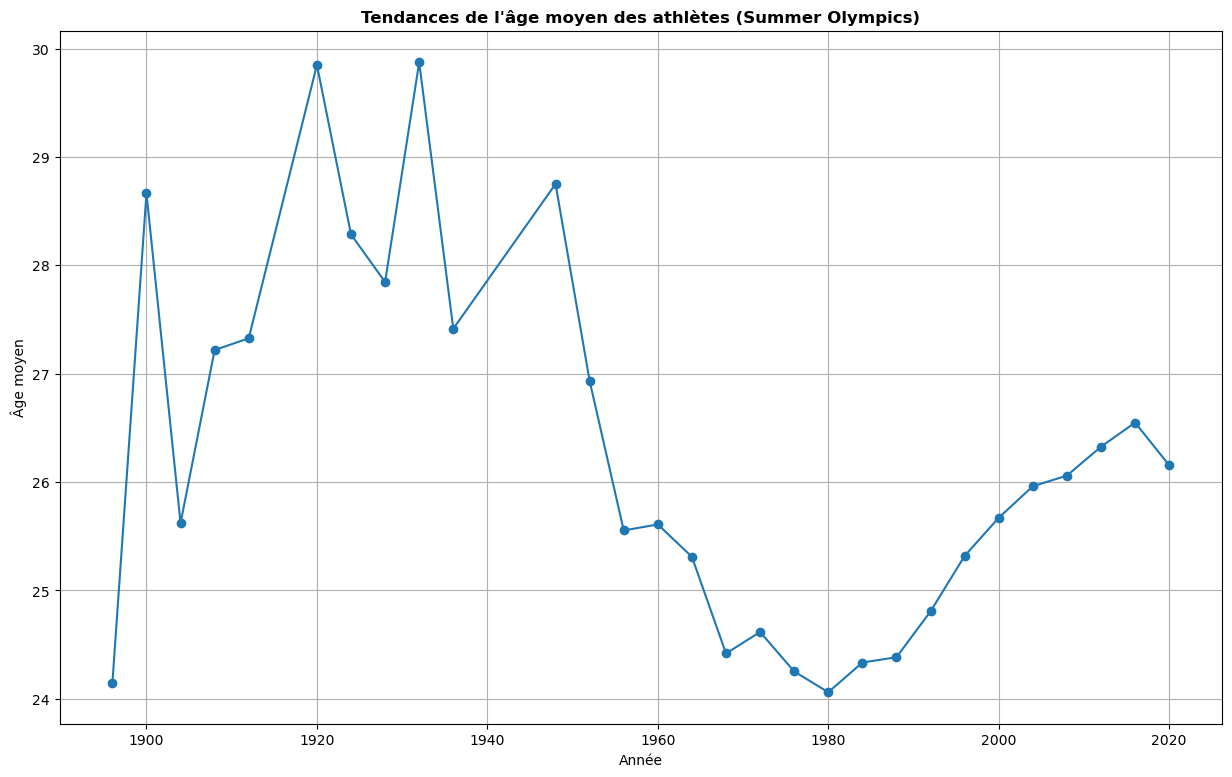

In [53]:
evlage="""
WITH AthleteAge AS (
    SELECT 
        a.IDATHLETE,
        a.DATENAISSANCE
    FROM 
        ATHLETE a
),
IndividualParticipation AS (
    SELECT
        pi.IDATHLETE,
        h.ANNEEHOTE AS ANNEEHOTE
    FROM
        PARTICIPATION_INDIVIDUELLE pi
    JOIN athlete a ON pi.IDATHLETE = a.IDATHLETE
    JOIN EVENEMENT e ON pi.IDEVENT = e.IDEVENEMENT
    JOIN HOTE h ON e.IDHOTE = h.IDHOTE
    WHERE
        h.SAISON = 'Summer'
),
TeamParticipation AS (
    SELECT
        a.IDATHLETE,
        h.ANNEEHOTE AS ANNEEHOTE
    FROM
        PARTICIPATION_EQUIPE pe
    JOIN EQUIPE eq ON pe.IDEQUIPE = eq.IDEQUIPE
    JOIN composition_equipe ce ON ce.IDEQUIPE = eq.IDEQUIPE
    JOIN Athlete a ON a.IDATHLETE = ce.IDATHLETE
    JOIN EVENEMENT e ON pe.IDEVENEMENT = e.IDEVENEMENT
    JOIN HOTE h ON e.IDHOTE = h.IDHOTE
    WHERE
        h.SAISON = 'Summer'
),
AllParticipation AS (
    SELECT 
        IDATHLETE,
        ANNEEHOTE
    FROM 
        IndividualParticipation
    UNION ALL
    SELECT 
        IDATHLETE,
        ANNEEHOTE
    FROM 
        TeamParticipation
),
AthleteParticipationAge AS (
    SELECT 
        p.ANNEEHOTE,
        a.IDATHLETE,
        p.ANNEEHOTE - EXTRACT(YEAR FROM a.DATENAISSANCE) AS AGE
    FROM 
        AllParticipation p
    JOIN 
        AthleteAge a ON p.IDATHLETE = a.IDATHLETE
)
SELECT 
    ANNEEHOTE,
    AVG(AGE) AS AverageAge
FROM 
    AthleteParticipationAge
GROUP BY 
    ANNEEHOTE
ORDER BY 
    ANNEEHOTE
"""
df_evlage = requete_vers_dataframe(conn, evlage)
plt.figure(figsize=(15, 9))
plt.plot(df_evlage['ANNEEHOTE'], df_evlage['AVERAGEAGE'], marker='o', linestyle='-')
plt.title('Tendances de l\'âge moyen des athlètes (Summer Olympics)', fontweight='bold')
plt.xlabel('Année')
plt.ylabel('Âge moyen')
plt.grid(True)
plt.show()

Ce graphique montre l'évolution de l'âge moyen des athlètes participant aux Jeux olympiques d'été de 1896 à 2020. 

Au début du siècle, l'âge moyen des athlètes participant aux Jeux olympiques était très variable, oscillant entre 24 et 29 ans. Cette fluctuation initiale s'explique par l'évolution des critères de sélection et la diversité des sports majeurs de l'époque. 

Dans les années 1920 et 1930, la moyenne d'âge culmine à environ 30 ans. Cette période a été marquée par la professionnalisation croissante des sports et l'exigence d'un niveau d'entraînement plus élevé, nécessitant des athlètes plus expérimentés. 

Après la Seconde Guerre mondiale, l'âge moyen a diminué de manière significative, atteignant un maximum d'environ 24 ans dans les années 1960. Cette tendance peut être attribuée à l'introduction de nouveaux sports favorisant les jeunes athlètes et à la participation accrue de jeunes compétiteurs. 

Depuis les années 1980, l'âge moyen des athlètes a progressivement augmenté, atteignant un nouveau pic dans les années 2000 et 2010. Cette augmentation reflète une meilleure compréhension de la science du sport, des soins et un entraînement plus sophistiqués qui prolongent la carrière sportive des athlètes, ainsi que l'inclusion d'un plus grand nombre de sports qui requièrent plus d'expérience.

### [Bonus] tailles des athlètes (et tendances à long terme):

   YEAR  TAILLEATHLETESCOUNT
0  1896                  243
1  1900                 2141
2  1904                 1364
3  1908                 2416
4  1912                 2876


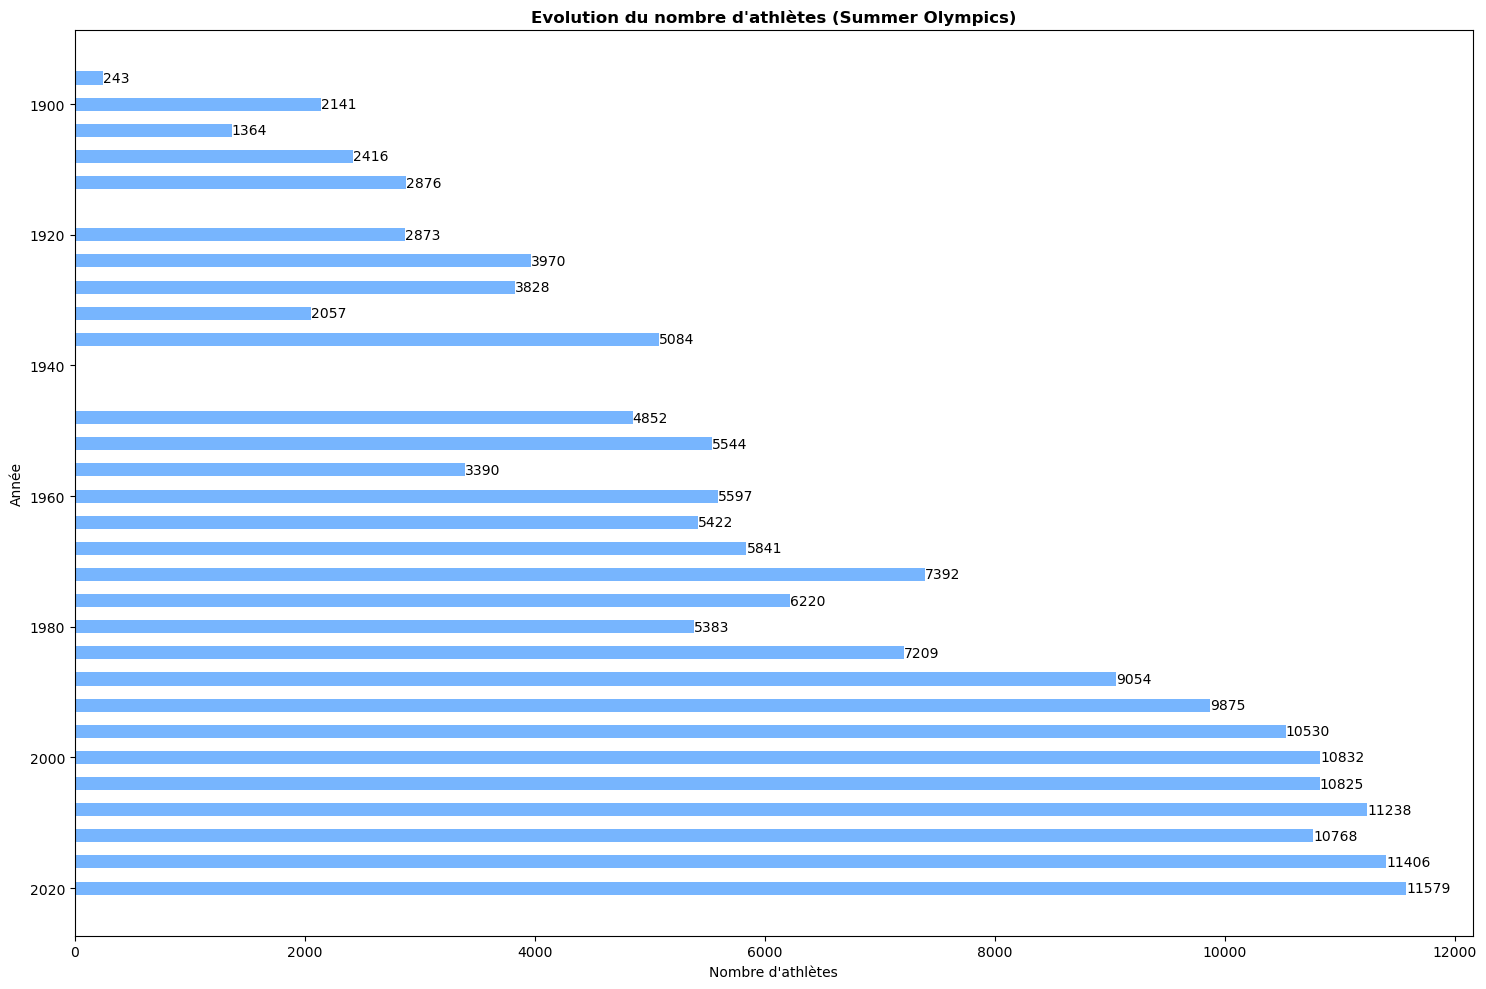

In [51]:
ath_query= f"""
WITH taillesAthletes AS (
    SELECT 
        ANNEEHOTE AS Year,
        COUNT(IDATHLETE) AS tailleAthletesCount
    FROM 
        (
            SELECT 
                pi.IDATHLETE,
                h.ANNEEHOTE
            FROM 
                PARTICIPATION_INDIVIDUELLE pi
            JOIN 
                ATHLETE a ON pi.IDATHLETE = a.IDATHLETE
            JOIN 
                EVENEMENT e ON pi.IDEVENT = e.IDEVENEMENT
            JOIN 
                HOTE h ON e.IDHOTE = h.IDHOTE
            WHERE 
                saison='Summer'
            UNION
            SELECT
                a.IDATHLETE,
                h.ANNEEHOTE
            FROM 
                PARTICIPATION_EQUIPE pe
            JOIN 
                COMPOSITION_EQUIPE ce ON pe.IDEQUIPE = ce.IDEQUIPE
            JOIN equipe eq ON eq.IDEQUIPE = ce.IDEQUIPE
            JOIN 
                ATHLETE a ON ce.IDATHLETE = a.IDATHLETE
            JOIN 
                EVENEMENT e ON pe.IDEVENEMENT = e.IDEVENEMENT
            JOIN 
                HOTE h ON e.IDHOTE = h.IDHOTE
            WHERE 
                saison='Summer'
        ) athletes
    GROUP BY 
        ANNEEHOTE
)
SELECT 
    Year,
    tailleAthletesCount
FROM 
    taillesAthletes
ORDER BY 
    Year
"""


df_ath = requete_vers_dataframe(conn, ath_query)

# Vérifier les données chargées
print(df_ath.head())

plt.figure(figsize=(15, 10))
bars = plt.barh(df_ath['YEAR'], df_ath['TAILLEATHLETESCOUNT'], color='#77B5FE', height=2)
plt.xlabel('Nombre d\'athlètes')
plt.ylabel('Année')
plt.title('Evolution du nombre d\'athlètes (Summer Olympics)', fontweight='bold')
plt.grid(False)
plt.gca().invert_yaxis()


for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.0f}', 
             va='center', ha='left', fontsize=10)
    
plt.tight_layout()
plt.show()



Ce graphique illustre l'évolution du nombre d'athlètes participant aux Jeux Olympiques d'été de 1896 à 2020.

Les premiers Jeux Olympiques en 1896 et 1900 ont eu un nombre relativement faible de participants, en grande partie en raison de contraintes logistiques et d'une faible couverture médiatique mondiale à l'époque. 

À partir des années 1920, le nombre d'athlètes a commencé à augmenter de façon spectaculaire, reflétant la reconnaissance internationale croissante des Jeux, l'ajout de nouveaux sports et la participation accrue des pays. 

En raison de la Seconde Guerre mondiale, les Jeux olympiques des années 1940 ont été annulés, de sorte que les données relatives à ces années sont manquantes. 

Après la guerre, le nombre d'athlètes a continué à augmenter régulièrement, atteignant des niveaux records en 2000 et 2010. Une grande partie de cette croissance peut être attribuée à la mondialisation, aux efforts du CIO pour inclure davantage de sports et de disciplines, et à la participation croissante des femmes. 

En conclusion, ce graphique montre comment les Jeux olympiques sont passés d'un événement modeste à une grande célébration du sport mondial, accueillant des milliers d'athlètes de presque tous les pays du monde.


### Féminisation : nombre d'événements féminins, nombre d'athlètes femme :

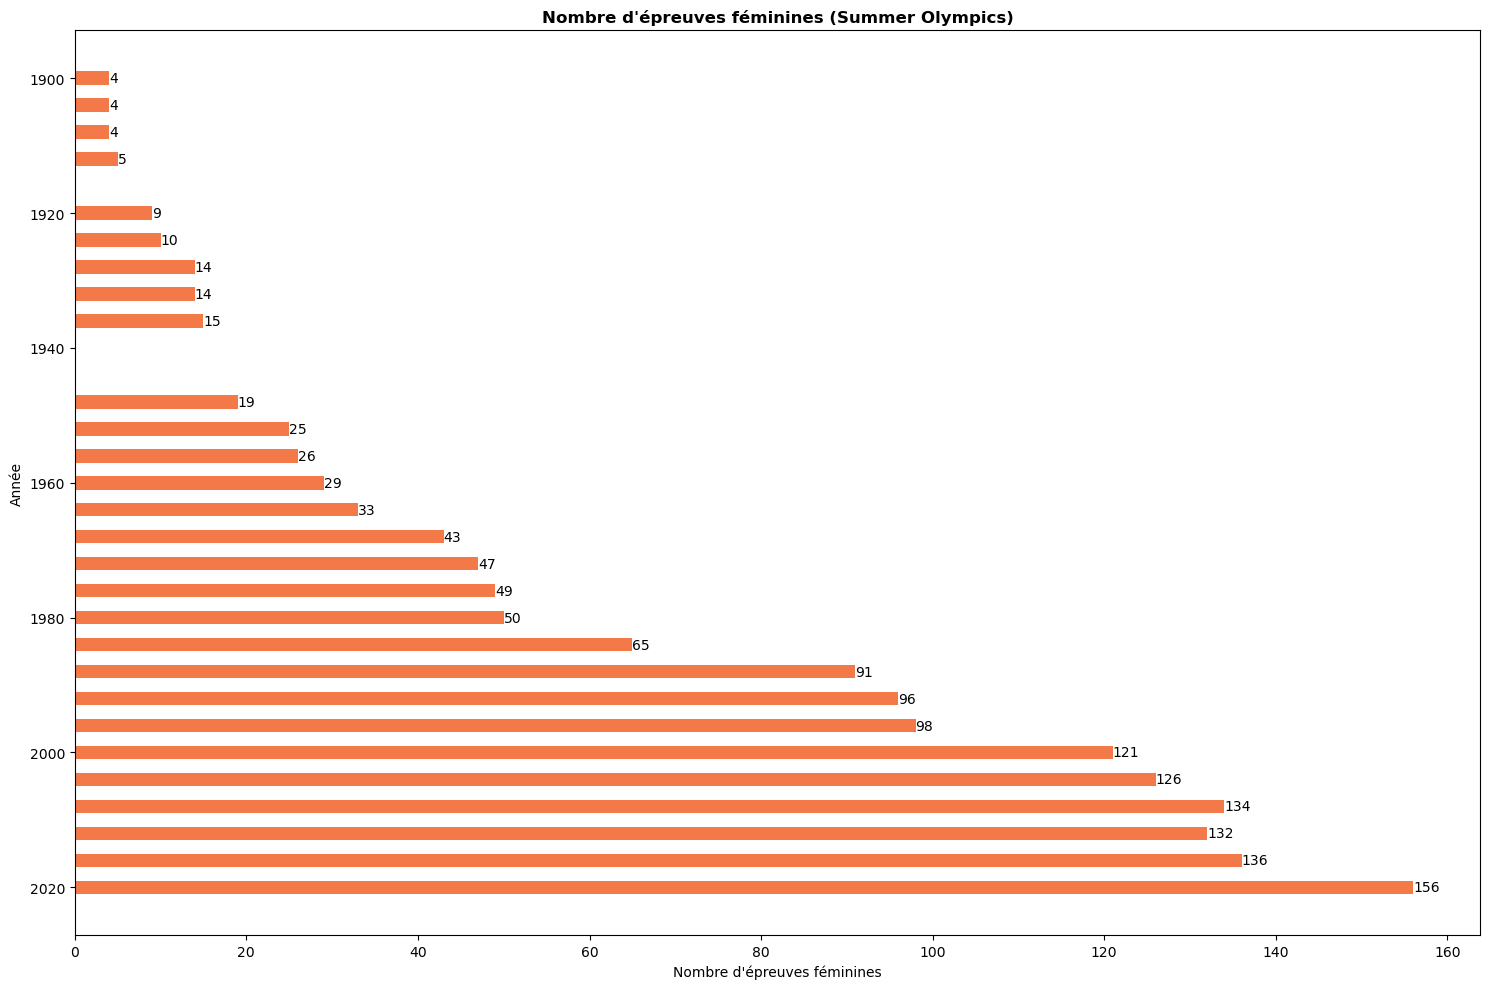

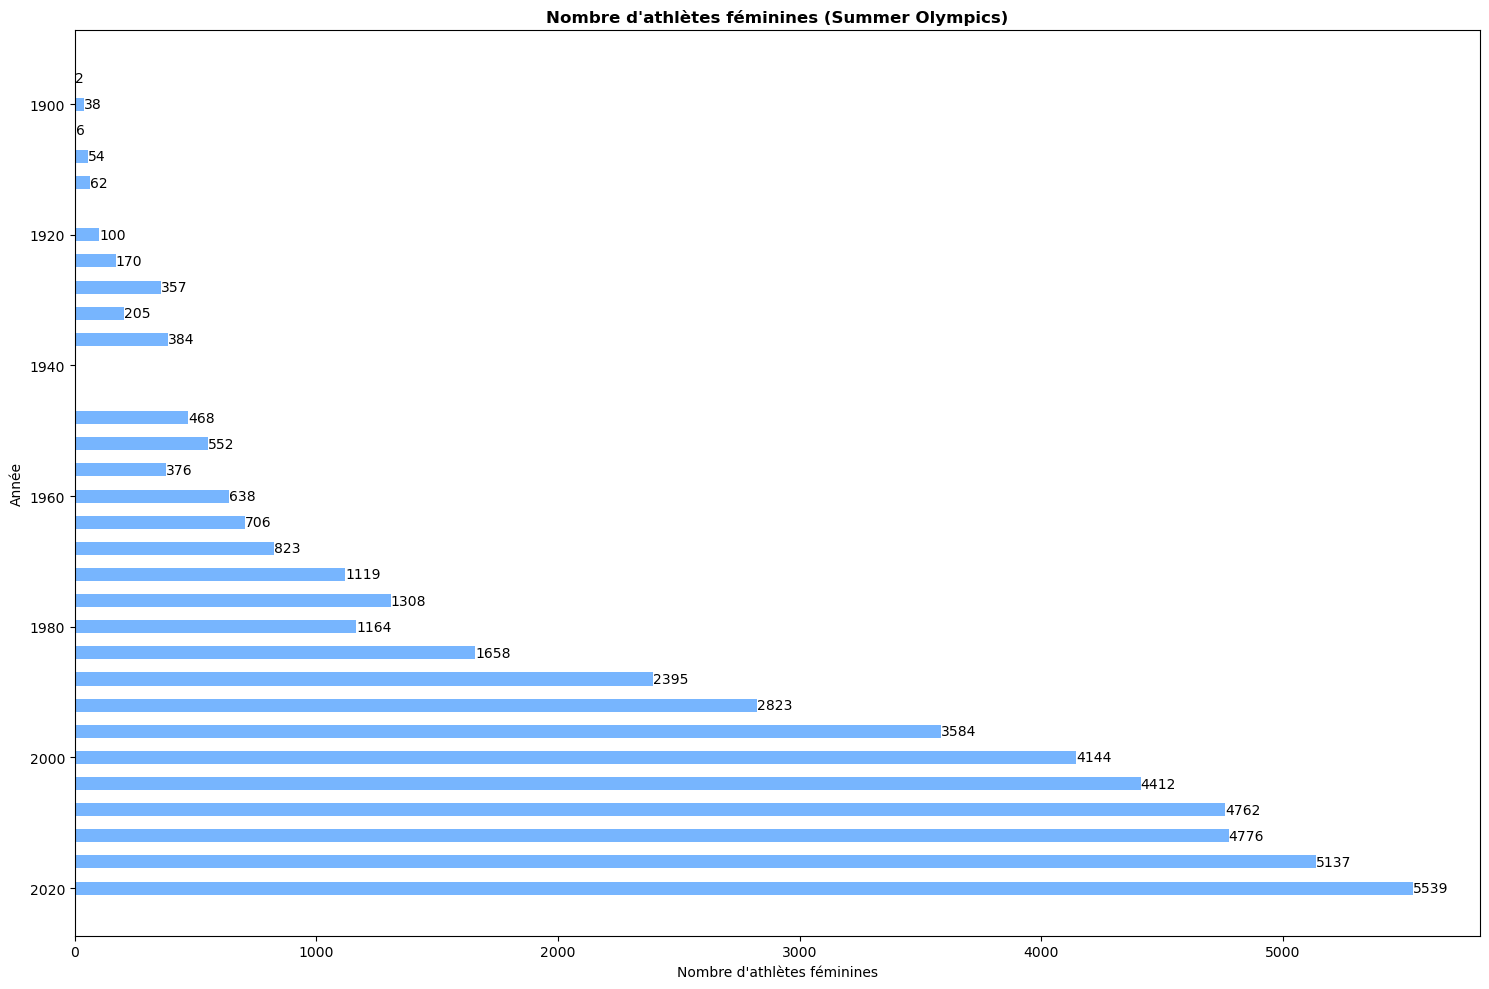

In [636]:
# nombre d"événement féminins
feve = f"""
WITH FemaleEvents AS (
    SELECT 
        e.IDEVENEMENT,
        h.ANNEEHOTE AS Year,
        'Female' AS GenreEpreuve
    FROM 
        EVENEMENT e
    JOIN 
        HOTE h ON e.IDHOTE = h.IDHOTE
    WHERE 
        LOWER(e.NOMEVENEMENT) LIKE '%women%'
        AND h.SAISON = 'Summer'
)
SELECT
    Year,
    GenreEpreuve,
    COUNT(DISTINCT IDEVENEMENT) AS NombreEpreuves
FROM 
    FemaleEvents
GROUP BY 
    Year, GenreEpreuve
ORDER BY 
    Year
"""

df_feve = requete_vers_dataframe(conn, feve)
plt.figure(figsize=(15, 10))
bars = plt.barh(df_feve['YEAR'], df_feve['NOMBREEPREUVES'], color='#f37a48', height=2) 
plt.ylabel('Année')
plt.xlabel('Nombre d\'épreuves féminines')
plt.title('Nombre d\'épreuves féminines (Summer Olympics)', fontweight='bold')

plt.grid(False)
plt.gca().invert_yaxis()
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.0f}', 
             va='center', ha='left', fontsize=10)

    
    
plt.tight_layout()
plt.show()







# nombre athlete femme
af_query = """
WITH FemaleAthletes AS (
    SELECT 
        ANNEEHOTE AS Year,
        COUNT(DISTINCT IDATHLETE) AS FemaleAthletesCount
    FROM 
        (
            SELECT DISTINCT 
                pi.IDATHLETE,
                h.ANNEEHOTE
            FROM 
                PARTICIPATION_INDIVIDUELLE pi
            JOIN 
                ATHLETE a ON pi.IDATHLETE = a.IDATHLETE
            JOIN 
                EVENEMENT e ON pi.IDEVENT = e.IDEVENEMENT
            JOIN 
                HOTE h ON e.IDHOTE = h.IDHOTE
            WHERE 
                a.GENRE = 'Female'
                AND saison='Summer'
            UNION
            SELECT DISTINCT 
                a.IDATHLETE,
                h.ANNEEHOTE
            FROM 
                PARTICIPATION_EQUIPE pe
            JOIN 
                COMPOSITION_EQUIPE ce ON pe.IDEQUIPE = ce.IDEQUIPE
            JOIN 
                ATHLETE a ON ce.IDATHLETE = a.IDATHLETE
            JOIN 
                EVENEMENT e ON pe.IDEVENEMENT = e.IDEVENEMENT
            JOIN 
                HOTE h ON e.IDHOTE = h.IDHOTE
            WHERE 
                a.GENRE = 'Female'
                AND saison='Summer'
        ) athletes
    GROUP BY 
        ANNEEHOTE
)
SELECT 
    Year,
    FemaleAthletesCount
FROM 
    FemaleAthletes
ORDER BY 
    Year
"""


df_af = requete_vers_dataframe(conn, af_query)
plt.figure(figsize=(15, 10))
bars = plt.barh(df_af['YEAR'], df_af['FEMALEATHLETESCOUNT'], color='#77B5FE', height=2)
plt.xlabel('Nombre d\'athlètes féminines')
plt.ylabel('Année')
plt.title('Nombre d\'athlètes féminines (Summer Olympics)', fontweight='bold')
plt.grid(False)
plt.gca().invert_yaxis()


for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.0f}', 
             va='center', ha='left', fontsize=10)
    
plt.tight_layout()
plt.show()

Le premier graphique montre l'évolution du nombre de sports féminins aux Jeux olympiques d'été de 1900 à 2020, date à laquelle les sports féminins ont été introduits pour la première fois en 1900 avec seulement quatre compétitions. 
 
Jusqu'aux années 1940, le nombre d'épreuves féminines a augmenté lentement, reflétant les attitudes conservatrices et les contraintes sociales de l'époque. 

À partir des années 1960, le nombre de sports féminins a augmenté plus rapidement, atteignant 50 en 1980. Cette période a coïncidé avec un changement social plus large, avec des campagnes pour l'égalité des sexes et une plus grande reconnaissance des capacités des femmes dans le sport. Depuis les années 1980, le nombre de programmes féminins a continué à augmenter de manière significative et atteindra 156 d'ici 2020. Cette croissance reflète les efforts du Comité international olympique pour promouvoir l'égalité des sexes et accroître la diversité des sports féminins.


Le deuxième graphique montre l'évolution du nombre de participantes de 1986 à 2020.Comme la majorité conservatrice de la fin du XIXe siècle, Coubertin n'était pas favorable à la participation des femmes au sport. Il estimait que le sport était trop violent pour les femmes et qu'il était moralement inapproprié pour les hommes de faire du sport.

Cependant, dès 1896, les femmes ont manifesté leur enthousiasme pour les épreuves olympiques. L'histoire de Stamata Revithi a été rapportée dans les médias grecs. Dans cette histoire, cette mère de famille de 30 ans s'est vu interdire de courir le marathon, mais sa fierté l'a poussée à courir la distance complète le lendemain de la course officielle.
En 1900, les deuxièmes Jeux olympiques, organisés à Paris, en France, ont ouvert l'accès aux femmes, en se concentrant sur le tennis, la natation, le golf, le tir à l'arc, la gymnastique, le patinage et la natation. À l'époque, les femmes ne représentaient que 2,2 % de l'ensemble des athlètes participants.

En tant qu'étendard de la civilisation humaine, le processus de développement des Jeux olympiques est étroitement lié aux mouvements sociaux, et les changements des Jeux olympiques incarnent et reflètent également les tendances de développement de la société dans son ensemble. Avec l'éveil progressif du mouvement féministe dans le monde entier, la voix des femmes s'est faite de plus en plus forte aux Jeux olympiques, avec de plus en plus d'athlètes féminines et de plus en plus de sports. 

Le graphique montre également que le nombre d'athlètes féminines a réellement commencé à augmenter à partir de 1920, car lors des Jeux olympiques d'Amsterdam en 1928, la délégation féminine britannique a boycotté ces Jeux en masse pour protester contre le faible nombre d'épreuves féminines. D'autre part, les femmes françaises ont également lancé les "Jeux olympiques des femmes" entre 1922 et 1934 et ont finalement négocié avec le CIO pour demander que les Jeux olympiques ajoutent des épreuves féminines à leur programme. Les femmes françaises ont également été à l'origine des "Jeux olympiques féminins" entre 1922 et 1934, et ont finalement négocié avec le Comité international olympique (CIO) pour augmenter le nombre d'épreuves féminines aux Jeux olympiques avant que les Jeux olympiques féminins ne soient suspendus.

Grâce aux efforts des pionnières, la participation des femmes aux grands événements sportifs, y compris les Jeux olympiques, a commencé à être soulignée, et la quête d'"égalité" et de "cohérence" des femmes avec les hommes s'est progressivement transformée en un plaidoyer en faveur de l'incarnation de la beauté des femmes dans le sport, avec de nombreux sports spécifiquement conçus pour les femmes apparaissant les uns après les autres au cours de cette période, tels que la natation synchronisée, la gymnastique artistique, et ainsi de suite.

Au cours des 128 années qui se sont écoulées depuis, pendant lesquelles les Jeux olympiques modernes ont voyagé de Paris à Paris et vice-versa, le nombre d'athlètes féminines participant aux Jeux olympiques est finalement devenu aussi élevé que le nombre d'athlètes masculins.



# Performance de l'équipe ITALY

## Analyse de l'équipe ITALY

### Nombre d'athlètes (et tendances à long terme) :

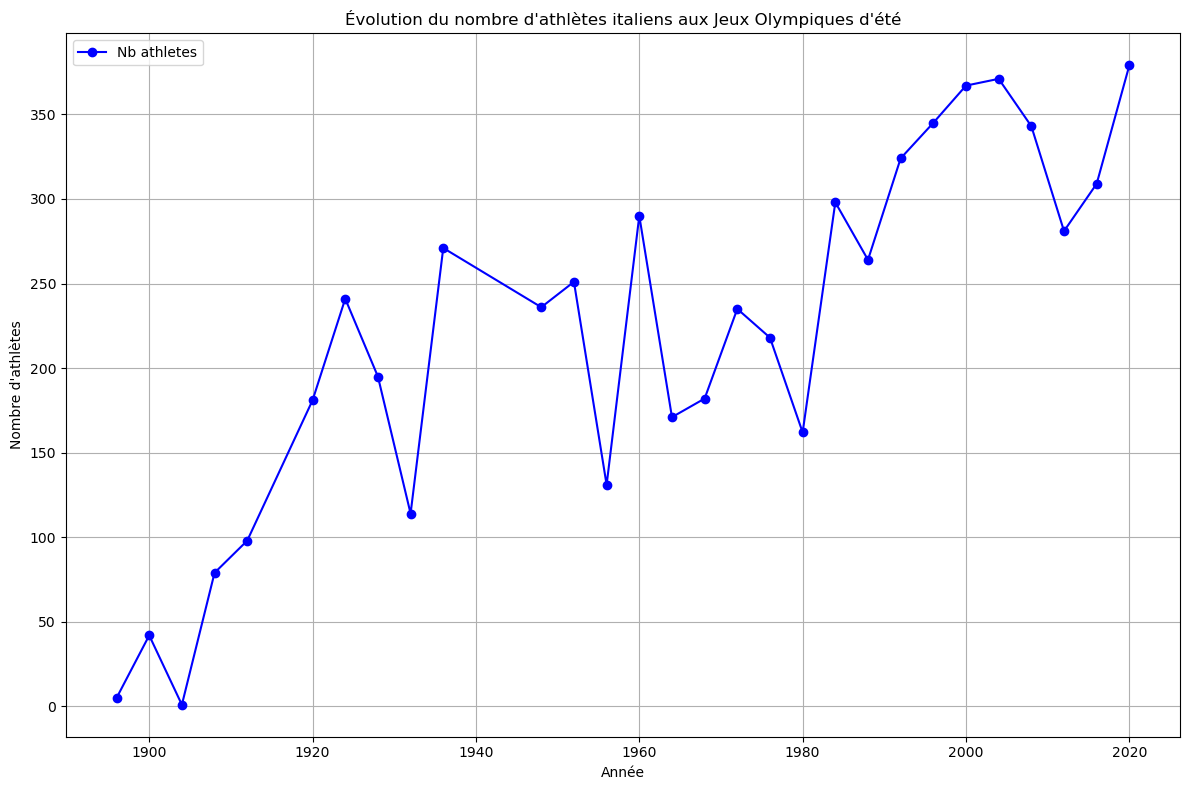

In [637]:
ITAAth_query = """
WITH ItaAthletes AS (
    SELECT 
        ANNEEHOTE AS Year,
        COUNT(IDATHLETE) AS AthletesCount
    FROM 
        (
            SELECT 
                pi.IDATHLETE,
                h.ANNEEHOTE
            FROM 
                PARTICIPATION_INDIVIDUELLE pi
            JOIN 
                ATHLETE a ON pi.IDATHLETE = a.IDATHLETE
            JOIN 
                EVENEMENT e ON pi.IDEVENT = e.IDEVENEMENT
            JOIN 
                HOTE h ON e.IDHOTE = h.IDHOTE
            WHERE 
                pi.NOC = 'ITA'
                AND saison='Summer'
            UNION
            SELECT
                a.IDATHLETE,
                h.ANNEEHOTE
            FROM 
                PARTICIPATION_EQUIPE pe
            JOIN 
                COMPOSITION_EQUIPE ce ON pe.IDEQUIPE = ce.IDEQUIPE
            JOIN equipe eq ON eq.IDEQUIPE = ce.IDEQUIPE
            JOIN 
                ATHLETE a ON ce.IDATHLETE = a.IDATHLETE
            JOIN 
                EVENEMENT e ON pe.IDEVENEMENT = e.IDEVENEMENT
            JOIN 
                HOTE h ON e.IDHOTE = h.IDHOTE
            WHERE 
                eq.NOC = 'ITA'
                AND saison='Summer'
        ) athletes
    GROUP BY 
        ANNEEHOTE
)
SELECT 
    Year,
    AthletesCount
FROM 
    ItaAthletes
ORDER BY 
    Year
"""

data_ITAAth = requete_vers_dataframe(conn, ITAAth_query)

plt.figure(figsize=(12, 8))
plt.plot(data_ITAAth['YEAR'], data_ITAAth['ATHLETESCOUNT'], marker='o', linestyle='-', color='b', label='Nb athletes')
plt.title('Évolution du nombre d\'athlètes italiens aux Jeux Olympiques d\'été')
plt.xlabel('Année')
plt.ylabel('Nombre d\'athlètes')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Ce graphique montre l'évolution du nombre d'athlètes italiens participant aux Jeux olympiques d'été de 1900 à 2020. Le graphique révèle certaines tendances et fluctuations au fil du temps. Au cours des premières décennies du XXe siècle, le nombre de participants était relativement faible, jusqu'en 1912, où le nombre d'athlètes participants était inférieur à 50. Cette situation s'explique par des facteurs économiques et logistiques, ainsi que par la nature naissante du Mouvement olympique lui-même.

Après la Première Guerre mondiale, la participation italienne a augmenté de façon spectaculaire, atteignant son apogée en 1928 avec près de 250 athlètes. Cette période de croissance peut être attribuée à l'amélioration des infrastructures sportives et à l'importance que la culture italienne accorde au sport. Toutefois, la participation a connu d'importantes fluctuations au cours des décennies suivantes, en particulier après la Seconde Guerre mondiale, avec des baisses significatives en 1948 et 1956 liées aux conséquences économiques et sociales de la guerre.

Les fluctuations des années 1970 et 1980 sont souvent liées à des boycotts politiques, tels que les Jeux de Moscou en 1980. Depuis 1988, le nombre d'athlètes italiens n'a cessé d'augmenter pour atteindre environ 350 d'ici 2020, reflétant une augmentation constante et soutenue de la participation italienne aux Jeux olympiques d'été. 

### Nombre de médailles (et tendances à long terme) :

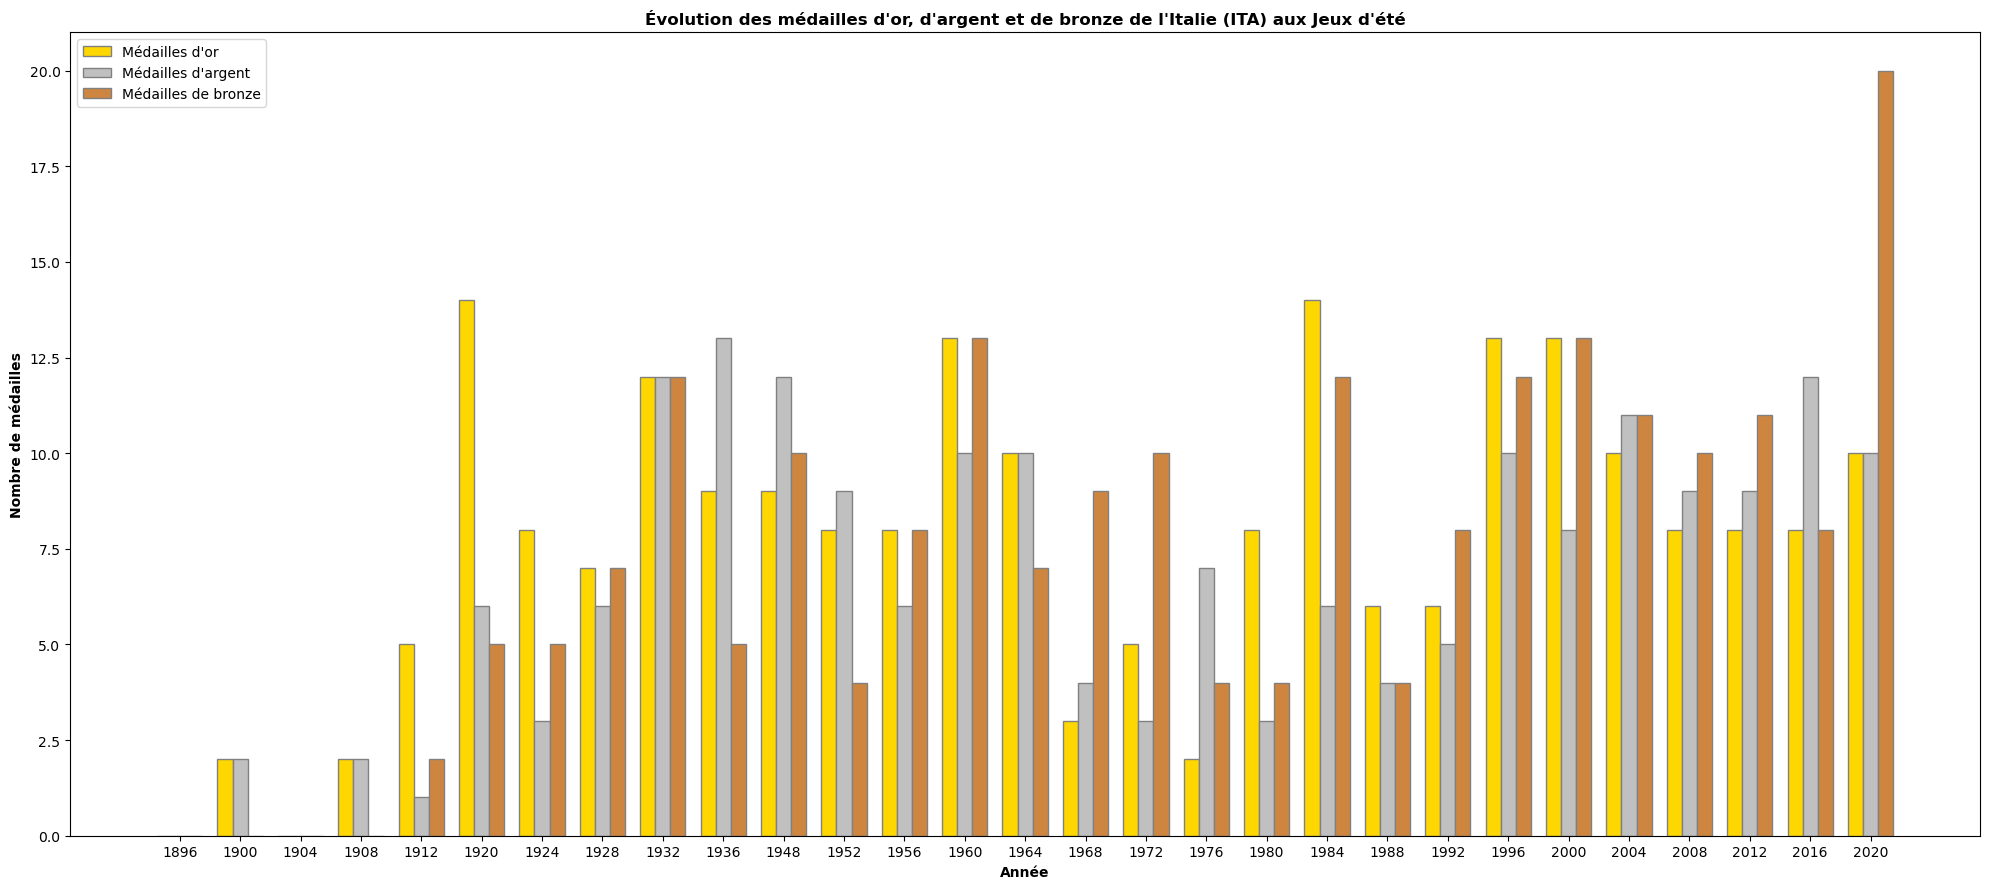

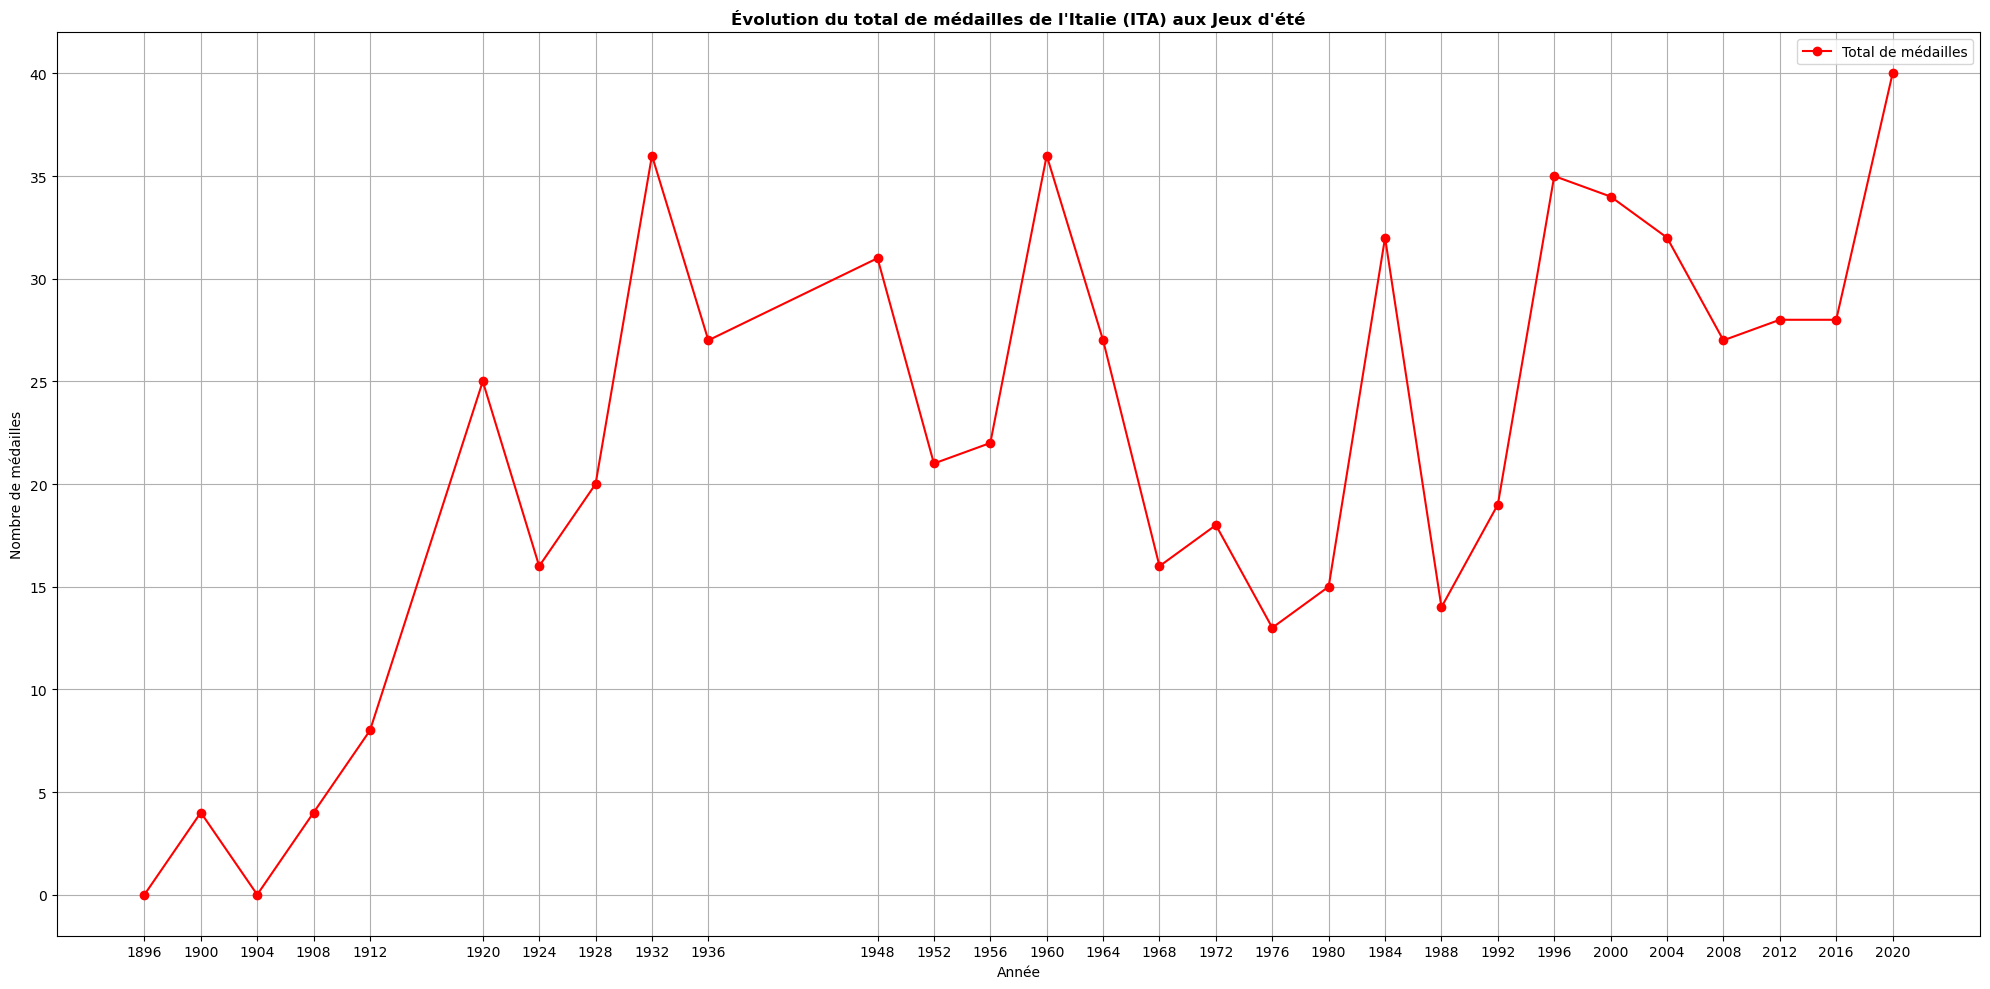

In [638]:
nbmed_query = f"""
WITH ItalyMedalsInd AS (
    SELECT 
        h.ANNEEHOTE AS Year,
        SUM(CASE WHEN pi.MEDAILLE = 'Gold' THEN 1 ELSE 0 END) AS GOLD_Medals_Ind,
        SUM(CASE WHEN pi.MEDAILLE = 'Silver' THEN 1 ELSE 0 END) AS SILVER_Medals_Ind,
        SUM(CASE WHEN pi.MEDAILLE = 'Bronze' THEN 1 ELSE 0 END) AS BRONZE_Medals_Ind,
        COUNT(pi.MEDAILLE) AS TOT_Medals_Ind
    FROM 
        PARTICIPATION_INDIVIDUELLE pi
    JOIN 
        ATHLETE a ON pi.IDATHLETE = a.IDATHLETE
    JOIN 
        EVENEMENT e ON pi.IDEVENT = e.IDEVENEMENT
    JOIN 
        HOTE h ON e.IDHOTE = h.IDHOTE
    WHERE 
        pi.NOC = 'ITA'
        AND h.SAISON = 'Summer'
    GROUP BY 
        h.ANNEEHOTE
),
ItalyMedalsTeam AS (
    SELECT 
        h.ANNEEHOTE AS Year,
        SUM(CASE WHEN pe.MEDAILLE = 'Gold' THEN 1 ELSE 0 END) AS GOLD_Medals_Team,
        SUM(CASE WHEN pe.MEDAILLE = 'Silver' THEN 1 ELSE 0 END) AS SILVER_Medals_Team,
        SUM(CASE WHEN pe.MEDAILLE = 'Bronze' THEN 1 ELSE 0 END) AS BRONZE_Medals_Team,
        COUNT(pe.MEDAILLE) AS TOT_Medals_Team
    FROM 
        PARTICIPATION_EQUIPE pe
    JOIN 
        EQUIPE eq ON pe.IDEQUIPE = eq.IDEQUIPE
    JOIN 
        EVENEMENT e ON pe.IDEVENEMENT = e.IDEVENEMENT
    JOIN 
        HOTE h ON e.IDHOTE = h.IDHOTE
    WHERE 
        eq.NOC = 'ITA'
        AND h.SAISON = 'Summer'
    GROUP BY 
        h.ANNEEHOTE
)
SELECT 
    COALESCE(Ind.Year, Team.Year) AS Year,
    COALESCE(GOLD_Medals_Ind, 0) + COALESCE(GOLD_Medals_Team, 0) AS GOLD_Medals_Total,
    COALESCE(SILVER_Medals_Ind, 0) + COALESCE(SILVER_Medals_Team, 0) AS SILVER_Medals_Total,
    COALESCE(BRONZE_Medals_Ind, 0) + COALESCE(BRONZE_Medals_Team, 0) AS BRONZE_Medals_Total,
    COALESCE(TOT_Medals_Ind, 0) + COALESCE(TOT_Medals_Team, 0) AS TOT_Medals_Total
FROM 
    ItalyMedalsInd Ind
FULL JOIN 
    ItalyMedalsTeam Team ON Ind.Year = Team.Year
ORDER BY 
    Year
"""

df_nbmed_query= requete_vers_dataframe(conn, nbmed_query)

plt.figure(figsize=(20, 9))

barWidth = 0.25
r1 = range(len(df_nbmed_query['YEAR']))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, df_nbmed_query['GOLD_MEDALS_TOTAL'], color='gold', width=barWidth, edgecolor='grey', label='Médailles d\'or')
plt.bar(r2, df_nbmed_query['SILVER_MEDALS_TOTAL'], color='silver', width=barWidth, edgecolor='grey', label='Médailles d\'argent')
plt.bar(r3, df_nbmed_query['BRONZE_MEDALS_TOTAL'], color='peru', width=barWidth, edgecolor='grey', label='Médailles de bronze')


plt.xlabel('Année', fontweight='bold')
plt.ylabel('Nombre de médailles', fontweight='bold')
plt.title('Évolution des médailles d\'or, d\'argent et de bronze de l\'Italie (ITA) aux Jeux d\'été', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(df_nbmed_query['YEAR']))], df_nbmed_query['YEAR'])
plt.legend()


plt.tight_layout()
plt.show()




plt.figure(figsize=(20, 10))

plt.plot(df_nbmed_query['YEAR'], df_nbmed_query['TOT_MEDALS_TOTAL'], marker='o', linestyle='-', color='r', label='Total de médailles')

plt.title('Évolution du total de médailles de l\'Italie (ITA) aux Jeux d\'été', fontweight='bold')
plt.xlabel('Année')
plt.ylabel('Nombre de médailles')
plt.xticks(df_nbmed_query['YEAR'])
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Ces deux graphiques portent sur l'évolution des médailles d'or, d'argent et de bronze remportées par l'Italie aux Jeux olympiques d'été. La première partie du graphique montre les médailles individuelles et la seconde le nombre total de médailles remportées au cours de la même période.

L'analyse des médailles individuelles montre que les années 1920 et 1930 ont été une période particulièrement riche en médailles pour l'Italie, avec des pics notables pour l'or et l'argent. Après la Seconde Guerre mondiale, l'Italie a maintenu une position relativement stable, bien que très fluctuante, dans les années 1950 et 1960. La période la plus récente, à partir de 1984, a vu une augmentation marquée du nombre de médailles, avec un pic en 2000, et le nombre élevé de médailles continue de démontrer la résilience et la compétitivité soutenue de l'Italie dans un large éventail de sports.

### Féminisation : nombre d'athlètes femme (et tendances à long terme) :

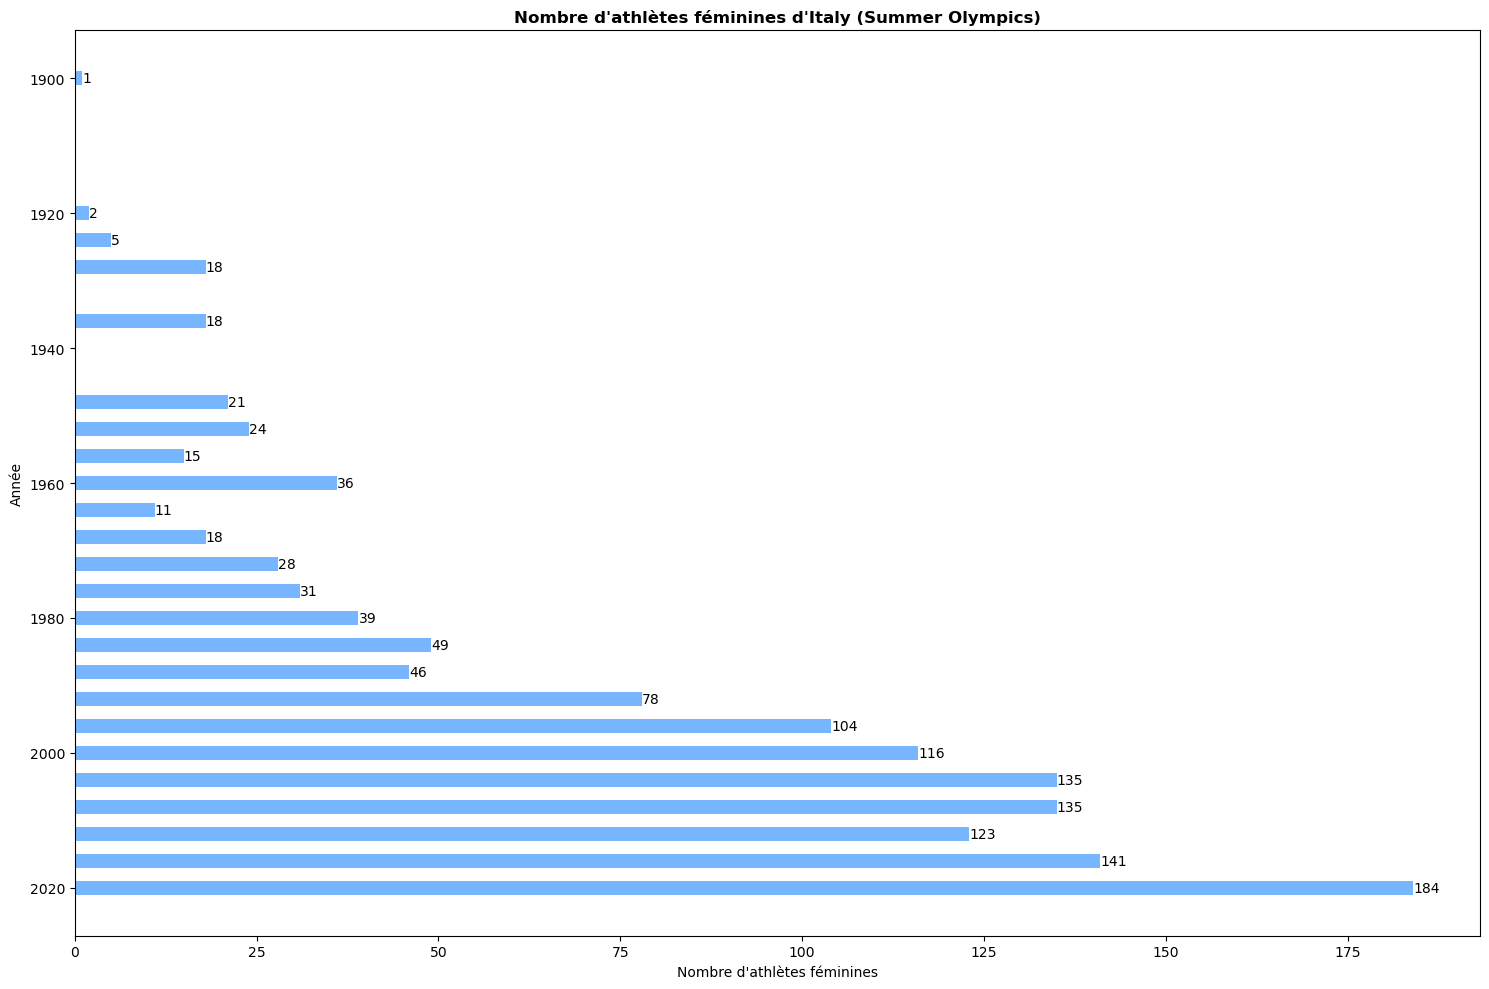

In [639]:
femin_query = """
WITH FemaleAthletes AS (
    SELECT 
        ANNEEHOTE AS Year,
        COUNT(DISTINCT IDATHLETE) AS FemaleAthletesCount
    FROM 
        (
            SELECT DISTINCT 
                pi.IDATHLETE,
                h.ANNEEHOTE
            FROM 
                PARTICIPATION_INDIVIDUELLE pi
            JOIN 
                ATHLETE a ON pi.IDATHLETE = a.IDATHLETE
            JOIN 
                EVENEMENT e ON pi.IDEVENT = e.IDEVENEMENT
            JOIN 
                HOTE h ON e.IDHOTE = h.IDHOTE
            WHERE 
                a.GENRE = 'Female'
                AND saison='Summer'
                AND pi.NOC = 'ITA'
            UNION
            SELECT DISTINCT 
                a.IDATHLETE,
                h.ANNEEHOTE
            FROM 
                PARTICIPATION_EQUIPE pe
            JOIN 
                COMPOSITION_EQUIPE ce ON pe.IDEQUIPE = ce.IDEQUIPE
            JOIN 
                Equipe eq ON eq.IDEQUIPE=ce.IDEQUIPE
            JOIN 
                ATHLETE a ON ce.IDATHLETE = a.IDATHLETE
            JOIN 
                EVENEMENT e ON pe.IDEVENEMENT = e.IDEVENEMENT
            JOIN 
                HOTE h ON e.IDHOTE = h.IDHOTE
            WHERE 
                a.GENRE = 'Female'
                AND saison='Summer'
                AND eq.NOC = 'ITA'
        ) athletes
    GROUP BY 
        ANNEEHOTE
)
SELECT 
    Year,
    FemaleAthletesCount
FROM 
    FemaleAthletes
ORDER BY 
    Year
"""

df_femin_query= requete_vers_dataframe(conn, femin_query)


plt.figure(figsize=(15, 10))
bars = plt.barh(df_femin_query['YEAR'], df_femin_query['FEMALEATHLETESCOUNT'], color='#77B5FE', height=2)
plt.xlabel('Nombre d\'athlètes féminines')
plt.ylabel('Année')
plt.title('Nombre d\'athlètes féminines d\'Italy (Summer Olympics)', fontweight='bold')
plt.grid(False)
plt.gca().invert_yaxis()


for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.0f}', 
             va='center', ha='left', fontsize=10)
    
plt.tight_layout()
plt.show()

Ce graphique se concentre sur l'évolution du nombre d'athlètes féminines italiennes participant aux Jeux olympiques d'été de 1900 à 2020. On constate une augmentation significative du nombre de participantes, en particulier à partir des années 1980.

Après un démarrage lent, avec très peu de femmes participantes jusqu'en 1960, l'augmentation a été plus prononcée dans les années 1980 et, en 2000, le nombre d'athlètes féminines a dépassé les 100. Cette croissance rapide reflète les efforts déployés pour promouvoir l'égalité des sexes dans le sport et le soutien institutionnel et culturel croissant en faveur de la participation des femmes au sport de compétition.

La croissance récente a été particulièrement importante, le nombre d'athlètes féminines atteignant 184 en 2020. Cela montre non seulement un intérêt croissant pour les athlètes féminines, mais aussi un soutien tangible aux athlètes féminines, contribuant à la diversité et à la force des équipes olympiques italiennes.

## Aspects prospectifs

Sur la base de l'analyse des graphiques précédents, nous pouvons proposer quelques conclusions concernant les performances futures de l'Italie aux Jeux olympiques d'été.

#### Augmentation du nombre d'athlètes:
La tendance générale montre que le nombre d'athlètes italiens participant aux Jeux olympiques d'été augmente. Si cette tendance se poursuit, on peut s'attendre à ce que l'Italie envoie davantage d'athlètes aux prochains Jeux olympiques. Cette croissance est un bon indicateur de la profondeur et de l'étendue du talent sportif italien.

#### Les performances en matière de médailles:
La tendance positive du nombre de médailles remportées par l'Italie suggère que le pays n'augmente pas seulement le nombre de participants, mais qu'il améliore également ses performances. Les pics atteints en 1932, 1960 et 2020 démontrent la capacité de l'Italie à figurer parmi les nations olympiques lors d'événements majeurs. Cette résilience et cette capacité d'adaptation sont de bon augure pour les futurs Jeux olympiques.

#### Participation féminine:
L'augmentation du nombre d'athlètes féminines est particulièrement encourageante. En continuant à promouvoir et à soutenir les athlètes féminines, l'Italie peut s'attendre à ce qu'elles contribuent de manière significative au nombre de médailles. Les politiques visant à promouvoir l'égalité des sexes dans le sport portent clairement leurs fruits et devraient continuer à le faire.

#### Prévisions pour les prochains Jeux olympiques:
Sur la base des tendances observées, il est raisonnable de prévoir que l'Italie maintiendra, voire augmentera, son nombre de médailles lors des prochains Jeux olympiques d'été. Avec l'augmentation du nombre de participants, la rigueur des préparations et le soutien continu aux athlètes masculins et féminins, l'Italie est bien placée pour continuer à être une force majeure aux Jeux olympiques.

#### Investissements et infrastructures : 
des investissements continus dans les infrastructures sportives, la formation des athlètes et les technologies sportives modernes sont essentiels pour maintenir cette tendance positive.
Encouragement des jeunes talents : un programme solide d'identification et de développement des jeunes talents assurera un flux constant de nouveaux athlètes compétitifs.

#### Soutien institutionnel :
le soutien continu des gouvernements et des organisations sportives est essentiel pour fournir les ressources nécessaires à la préparation et à la compétition au plus haut niveau.